<a href="https://colab.research.google.com/github/quasar-in-the-mist/Numerical-Relativity/blob/main/Numerical_Relativity_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CONJUGAtE MOMENTA VARIABLES FOR UPDATER




#Returns dot_pi_up, an array for the time derivative of π^i^j.

# In synchronous gauge, N=1, N^i=0 => H = ∫ d^3x ( π^ij dot(γ_ij) - L ), so
# dot_pi_up^ij follows from Hamilton’s equations.  The final schematic form is:
#
#   dot(pi^ij) = - √γ [ R^ij - ½ R γ^ij ]
#                + (1 / √γ) [ π^i_k π^j_l γ^{kl} - ½ (π) π^ij ]
#                + ½ √γ T^ij
#
#   where π = γ_{m n} π^m^n is the “trace” of π^ij.

# Compute inverse and determinant of the 3-metric:


# --- Term 1:  - √γ ( R^ij - ½ R γ^ij ) ---
sqrt_gamma = np.sqrt(det_gamma)
term1 = - sqrt_gamma * (R_up - 0.5 * R * gamma_up) #Ricci Terms

# --- Term 2:  (1 / √γ) [ π^i_k π^j_l γ^{kl} - ½ (π) π^ij ] ---
# First compute π = γ_{m n} π^m^n, the “trace” of π^ij:
trace_pi = np.einsum('mn,mn->', gamma_dn, pi_up)   # γ_{m n} π^{m n}

# The product π^i_k π^j_l γ^{k l} involves index gymnastics; a direct way:
# (π^i_k) = (γ_dn)_{k u} times pi_up^{i u} or vice versa, etc.
# But often one just uses einsum carefully:
#
#   π^i_k = ∑_m pi_up[i,m] * (some factor putting down m?), etc.
#
# For brevity we can do it in one shot by noticing that
#   π^i_k π^j_l γ^{k l} = einsum('ik,jl,kl->ij', pi_i^k, pi_j^l, γ^k^l),
# but if pi_up is stored as π^i^j we need to “lower” one index.
#
# The snippet below is schematic:  We define pi_i_k by contracting with γ_dn:
pi_i_k = np.einsum('ia,ak->ik', gamma_dn, pi_up)  # lowers first index of pi_up
pi_j_l = np.einsum('ja,al->jl', gamma_dn, pi_up)  # lowers first index of pi_up
# Then contract with gamma_up:
term2A = np.einsum('ik,jl,kl->ij', pi_i_k, pi_j_l, gamma_up)

# Now minus (½ π) π^i^j:
term2B = -0.5 * trace_pi * pi_up

# Combine them, scaling by 1 / √γ:
term2 = (1.0 / sqrt_gamma) * (term2A + term2B)  #Pi Pi- GRAV GRAV------------------------------------------------------------

# --- Term 3:  ½ √γ T^ij ---
term3 = 0.5 * sqrt_gamma * T_up #TUP----------------------------------------------------------------------------------------------

# Sum everything to get dot_pi^i^j:
dot_pi_up = term1 + term2 + term3

In [ ]:


# Note: This example is very simplified and lacks the comprehensive features needed in a full simulation.





array([[[-8.82619196e+01, -9.75445067e+01, -1.07803352e+02, ...,
         -9.70414849e+03, -1.07247427e+04, -1.18526737e+04],
        [-8.78209776e+01, -9.70571905e+01, -1.07264784e+02, ...,
         -9.65566817e+03, -1.06711637e+04, -1.17934597e+04],
        [-8.65025575e+01, -9.56001109e+01, -1.05654462e+02, ...,
         -9.51071161e+03, -1.05109619e+04, -1.16164094e+04],
        ...,
        [ 1.09344722e+00,  1.20844607e+00,  1.33553945e+00, ...,
          1.20221430e+02,  1.32865228e+02,  1.46838786e+02],
        [-7.72282824e+00, -8.53504518e+00, -9.43268371e+00, ...,
         -8.49103128e+02, -9.38404084e+02, -1.03709690e+03],
        [-1.64619398e+01, -1.81932571e+01, -2.01066586e+01, ...,
         -1.80994373e+03, -2.00029717e+03, -2.21067026e+03]],

       [[ 1.32345642e+03, -9.03038881e+00, -9.98012309e+00, ...,
         -8.98382050e+02, -9.92865715e+02, -2.56896225e+03],
        [ 1.32487577e+03, -1.09507359e-01, -1.21024349e-01, ...,
         -1.08942647e+01, -1.20400245e

---f0---
1.3333256921325691
--- w BOUND ---
0.7453559925097218
0.8593818037918515
-0.8593818037918515
1.0


<ipython-input-86-721edd350169>:424: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y_x = odeint(qball_ode, r0, r, (w,)) #ODE INT on ODE QBALLL
<ipython-input-86-721edd350169>:439: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y_x = odeint(qball_ode, r0, r, (w,))


0.8593818037918515
1.0


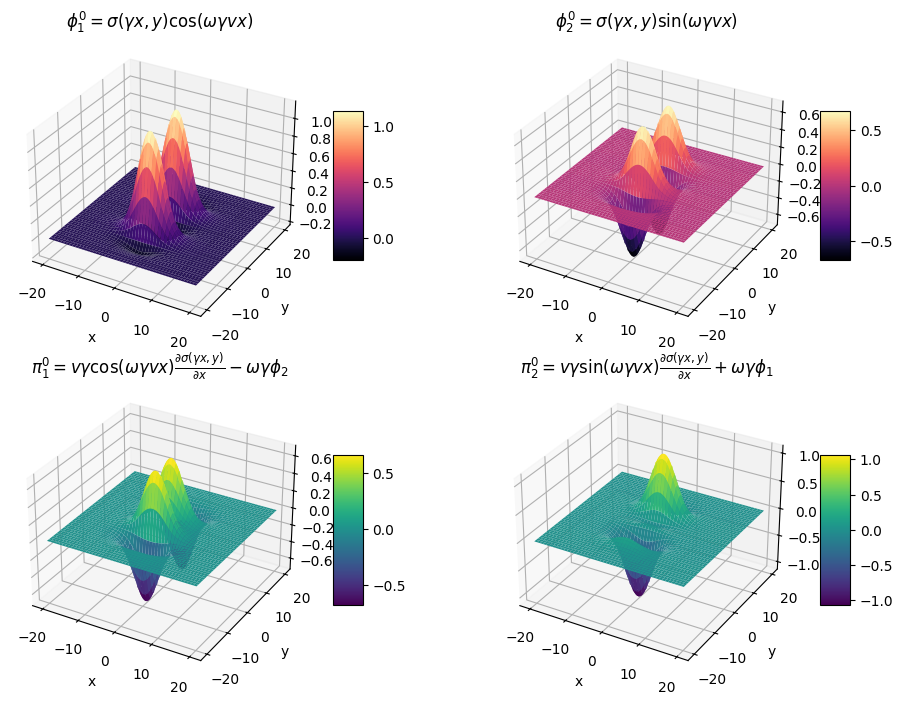

In [86]:
import numpy as np
#SOLVE FIELD PROFILE---------------------------------------------
from scipy import interpolate

#GRIDSIZE
smalln=33#ALSO ODD?
NUMPOINTS=smalln*3#ODD ONLY FOR ROTATION SYMMETRY
domain=20
MIDDLE=round((NUMPOINTS-1)/2)
DIM=2
STARTsigma=1.169 #0.5 #CHOICE STES Q etc 1.455 wuni vs uni
VELx=0.4 #4 #VEL
VELx2=VELx
LOC=6 #LOCATION
LOC2=LOC
GAMMAFACTOR=1.0+0.0*(1.0/np.sqrt(1.0-VELx**2))
SIGN=1.0 #SIGN of w on second Q BALL (ANTI QBALL)
SIGNSOL=1.0
######
#IMPACT 5
LOCy=-3*0
VELy2=0.0
VELy=0
LOC2y=3*0
#####
MASS=1 #GeV
BB=0.5#Will VARY
QUARTIC=BB
AA=1
CUBIC=AA
OMEGAminus=0.8

#TWO? QBALL===============================================================================================
#TWO? QBALL===============================================================================================
#params_list= np.array([[STARTsigma , 1.1 , OMEGAminus,-LOC , 0.0 , -VELx, VELy]]) #NUMBER OF Q BALLS AS NEW ROWS
params_list= np.array([[STARTsigma , 1.1 , OMEGAminus,-LOC , LOCy , -VELx, VELy],[STARTsigma ,SIGN*OMEGAminus, SIGN*1.1  , LOC2 , LOC2y , VELx2, VELy]]) #NUMBER OF Q BALLS AS NEW ROWS
#TWO? QBALL===============================================================================================
#TWO? QBALL===============================================================================================


#
#params_list= np.array([[STARTsigma , 1.1 , OMEGAminus,-LOC , LOCy , -VELx, VELy]]) #NUMBER OF Q BALLS AS NEW ROWS

#params_list= np.array([[STARTsigma ,SIGN*OMEGAminus, SIGN*1.1  , LOC2 , LOC2y , VELx2, VELy]])
#params_list= np.array([[STARTsigma , 1.1, OMEGAminus  , LOC2 , LOC2y , VELx2, VELy]]) #NUMBER OF Q BALLS AS NEW ROWS



#TESTOMEGA=0.5*MASS



#origin centred grid:
x=np.linspace(-domain,domain,NUMPOINTS)
xx,yy,zz=np.meshgrid(x,x,x)
#Step size changes: The physical distance beteen neighbouring grid points
step=x[1]-x[0]
STEP=step #BOX LENGTH over NUMPOINTS , configuration space distance
#STATE VECTOR==========================================================
STATEVECTORLENGTH=16

#Potential of  phis: -----------------------------------
def V(phi):
    return ((MASS**2)/2)*np.abs(phi)**2  -(CUBIC/3)*np.abs(phi)**3 + (1/4.0)*QUARTIC*(np.abs(phi)**4)

def Vovermodsq(phi):
    return (((MASS**2)/2)*np.abs(phi)**2  -(CUBIC/3)*np.abs(phi)**3 + (1/4.0)*QUARTIC*(np.abs(phi)**4))/(np.abs(phi)**2)

def DVDphi1(phi):
    return (MASS**2)*np.abs(phi)**1 - CUBIC*abs(phi)**2 + QUARTIC*np.abs(phi)**3

def Vomega(phi,omega):
    return DVDphi1(phi) - (omega**2)*(np.abs(phi)**1) #Units of derivative



# #U1----------
# #Potential minus [omega=1/2 mass ] term: Within minspace, the initial value will drop to find 0. Set strting value at VEV of NEG func?
# def UNEG(phi):
#   return((MPHI**2)*(phi**1)  -(4.0)*alpha4*(phi**3) +(6.0)*lam6*(phi**5))-phi*(MPHI/2)**2

#Plot PARAMS===========================================
phiI= -300 #INITIAL
phiF=300#FINAL
phiVECPOS2 = np.linspace(.001, phiF,10**7)
#U'(phi)-phi omega**2 :NEG between:

#Minima of the potential
index_min = np.argmin(Vovermodsq(phiVECPOS2))
fzero= phiVECPOS2[index_min ]
print('---f0---')
print(fzero)
print('--- w BOUND ---')
wminus=np.sqrt(2*V(fzero)/(fzero**2))
print(wminus)
OMEGAminus=wminus

# #QDATAFRAME for TWO Q BALLS============================================================= As scalar in f[0] and 0 in the rest
QDATAFRAME=np.zeros((STATEVECTORLENGTH, NUMPOINTS,NUMPOINTS,NUMPOINTS)) #s in STATEVECTORLENGTH , i j k in NUMPOINTS
# Q2DATAFRAME=np.zeros((STATEVECTORLENGTH, NUMPOINTS,NUMPOINTS,NUMPOINTS)) #s in STATEVECTORLENGTH , i j k in NUMPOINTS
# #MINKWOSKI SPACE
# BM=np.array([[2.71828183, 0.        , 0.        ],
#        [0.        , 2.71828183, 0.        ],
#        [0.        , 0.        , 2.71828183]])
# BM

# #FUNC: Z(x,y) # we could interpolate the LATSOL=================
# radline = r
# #FLAT================================================================
# y=LATsolstep #OR LATsol.y LATsol HEAVISIDE VS SOLVED PROFILE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  LAT SOL / HEAVISIDE SOL!!!!!!!!!!!!!!!
# PHIoRADIUS = interpolate.interp1d(radline, y,fill_value='extrapolate')
# THETAoRADIUS= interpolate.interp1d(radline, THETAstep,fill_value='extrapolate')
# PITHETAoRADIUS= interpolate.interp1d(radline, THETAVELstep,fill_value='extrapolate')

# #And find the phi of radius for each pythag radius################# {phi  THETA, PI, PI}
# for i in  np.arange(0,NUMPOINTS,1):
#     for j in  np.arange(0,NUMPOINTS,1):
#         for k in  np.arange(0,NUMPOINTS,1):
#             QDATAFRAME[0,i,j,k]= PHIoRADIUS(((x[i]-XCEN)**2 +(x[j]-YCEN)**2+(x[k]-ZCEN)**2))
#             QDATAFRAME[1,i,j,k]= THETAoRADIUS(((x[i]-XCEN)**2 +(x[j]-YCEN)**2+(x[k]-ZCEN)**2))
#             QDATAFRAME[3,i,j,k]= PITHETAoRADIUS(((x[i]-XCEN)**2 +(x[j]-YCEN)**2+(x[k]-ZCEN)**2))
# ##################################################################

# #And find the phi of radius for each pythag radius################# {phi  THETA, PI, PI}
# for i in  np.arange(0,NUMPOINTS,1):
#     for j in  np.arange(0,NUMPOINTS,1):
#         for k in  np.arange(0,NUMPOINTS,1):
#             Q2DATAFRAME[0,i,j,k]= PHIoRADIUS(((x[i]-XCEN2)**2 +(x[j]-YCEN2)**2+(x[k]-ZCEN2)**2))
#             Q2DATAFRAME[1,i,j,k]= THETAoRADIUS(((x[i]-XCEN2)**2 +(x[j]-YCEN2)**2+(x[k]-ZCEN2)**2))
#             Q2DATAFRAME[3,i,j,k]= PITHETAoRADIUS(((x[i]-XCEN2)**2 +(x[j]-YCEN2)**2+(x[k]-ZCEN2)**2))
# ##################################################################







#------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from scipy.integrate import odeint
######################################################################################################################################################################################################
######################################################################################################################################################################################################
######################################################################################################################################################################################################

#CITATION NOTE VANA... UBC GITHUB TRI Q BALL COLLISION FOLLLOW UP FROM UBC GUITERREZ PHD THESIS
#----------------------------------------------------------------------------
def qball_maker(w, pos, v, data): #omega, centre coords 2D,velocity grid data
    v_x, v_y = v
    speed = (v_x**2+v_y**2)**0.5
    gamma = 1/(1-speed**2)**0.5

    x, y = np.meshgrid(np.linspace(-domain, domain, n), np.linspace(-domain, domain, n))
    x0, y0 = pos #center of q ball

    # rotating so that qball is travelling in the x direction for lorentz transformation
    theta = -np.arctan2(v_y,v_x)

    x_rotated = x * np.cos(theta) - y * np.sin(theta)
    y_rotated = x * np.sin(theta) + y * np.cos(theta)
    x0_rotated = x0 * np.cos(theta) - y0 * np.sin(theta)
    y0_rotated = x0 * np.sin(theta) + y0 * np.cos(theta)

    gamma_x = (x_rotated-x0_rotated) * gamma
    boosted_coords = (gamma_x**2 + (y_rotated-y0_rotated)**2)**0.5

    sigma_gamma = np.array([[lag(i, data) for i in row] for row in boosted_coords])

    phi_01_boost = sigma_gamma*np.cos(w*gamma*speed*(x_rotated-x0_rotated))
    phi_02_boost = sigma_gamma*np.sin(w*gamma*speed*(x_rotated-x0_rotated))

    dsdx = np.gradient(sigma_gamma, np.linspace(-domain, domain, n), axis=1)
    dsdy = np.gradient(sigma_gamma, np.linspace(-domain, domain, n), axis=0)
    dsdu = (dsdx*v_x/speed + dsdy*v_y/speed)/gamma

    #sign diference there
    #complex single Q ball
    pi_01_boost = dsdu*np.cos(w*gamma*speed*(x_rotated-x0_rotated))*gamma*speed - w*phi_02_boost*gamma
    pi_02_boost = dsdu*np.sin(w*gamma*speed*(x_rotated-x0_rotated))*gamma*speed + w*phi_01_boost*gamma

    return phi_01_boost, phi_02_boost, pi_01_boost, pi_02_boost

#----------------------------------------------------------------------------
def lag(x, data):
    i = (np.abs(data[:,0] - x)).argmin()

    low_i = max(0, i-2)
    high_i = min(len(data[:,0]), low_i+4)

    if high_i==len(data[:,0]):
        low_i = len(data[:,0])-4

    xdata = [data[:,0][n] for n in range(low_i, high_i)]
    ydata = [data[:,1][n] for n in range(low_i, high_i)]

    data_points = len(xdata)  # 4 in this case

    # main lagrange interpolation function
    y = 0
    for i in range(data_points):
        p = 1
        for j in range(data_points):
            if i != j:
                p = p * (x - xdata[j])/(xdata[i] - xdata[j])
        y = y + p * ydata[i]

    return y
  #ODE SOLVE:

global FOUNDOMEGA
FOUNDOMEGA=0
#----------------------------------------------------------------------------
def ode_solver(s0, bounds):
    w_high, w_low = bounds
    w = (w_high+w_low)/2

    r0 = [s0,0]

    r = np.linspace(0, 100, int(1e3))
    y_x = odeint(qball_ode, r0, r, (w,)) #ODE INT on ODE QBALLL

    while abs(w_high-w_low)>1e-15:
        inf = 0

        for y in y_x[:,0]:
            if abs(y) > s0:
                w_high = w
                inf = 1
                break

        if inf == 0:
            w_low = w

        w = (w_high+w_low)/2
        y_x = odeint(qball_ode, r0, r, (w,))

    print(w)
    global FOUNDOMEGA
    FOUNDOMEGA=w

    return exp_fit(w, r, y_x) #EXP FIT



#CF POTENTIALS
# def DVDphi1(phi):
#   return (MASS**2)*np.abs(phi)**1 - CUBIC*abs(phi)**2 + QUARTIC*np.abs(phi)**3

# def Vomega(phi,omega):
#   return DVDphi1(phi) - (omega**2)*(np.abs(phi)**1) #Units of derivative
#A CUBUC 1. BQUARTIC -2.. , MASS set to 1

#----------------------------------------------------------------------------
def qball_ode(y, r, w):
    s = y[0]
    u = y[1]

    if r == 0:
        dydr = [u, (1/2)*((w**2 - 1)*s0-s0**2+BB*s0**3)]
    else:
        dydr = [u, -(DIM/r)*u-s*(w**2 - 1)-AA*s**2 + BB*s**3]   #DIMENSION FACTOR? D-1 =3-2=2:::::: (D-1/r)

    return dydr

#----------------------------------------------------------------------------
def exp_fit(w, r, y_x):
    start = 0
    diff = abs(y_x[:,0][0]-y_x[:,0][1])
    fit_threshold =  1e-5
    #print(len(y_x))
    #FINDING AN EXPONENTIAL FIT: BREAK BEFORE END EXPECTED error if no solution found at i+1
    for i in range(len(y_x[:,0])):
        new_diff = abs(y_x[:,0][i]-y_x[:,0][i+1]) #MOFIFIED from diff of i i+1
        #print(i)
        if abs(y_x[:,0][i])<=fit_threshold and not start:
            start = i
        if start and new_diff>diff:
            end = i-1
            break
        diff = new_diff

    x1 = r[start]
    x2 = r[end]
    y1 = y_x[:,0][start]
    y2 = y_x[:,0][end]

    b = (np.log(y2)-np.log(y1))/(x1-x2)
    a = y1/(np.exp(-b*x1))

    popt = [a,b]

    # making and saving the piecewise function for the s0
    piecewise_y = np.append(y_x[:,0][:start], exp_func(r[start:], *popt))

    return [w, np.transpose([r, piecewise_y])]

#----------------------------------------------------------------------------
def exp_func(x, a, b):
    return a * np.exp(-b * x)
#----------------------------------------------------------------------------


#-#-#----------------------------------------------------------#-#-#
#SERIESL = np.load('/content/drive/My Drive/params.csv')
#params_list = np.loadtxt('/content/drive/My Drive/params2.csv', delimiter=' ', skiprows=1)

#SET VELOCITY to zero for smooth Q ball


#or two rows the same...
#params_list= np.array(((1,1,0.5,0,0,0.1,0.1)))
#PARAMS.CSV
#A B domain n
#s0 w_high w_low x y v_x v_y  # repeat for n Q-balls : FIELD VALUE omega high and low position and velocity 2d
#1 1 0.5 0 0 0.1 0.1
#1 1 0.5 0 0 0.1 0.1
#params_list
#-#-#----------------------------------------------------------#-#-#


#if params_list.ndim == 1:
#    params_list = np.array([params_list])
#A, B, domain, n = np.genfromtxt('/content/drive/My Drive/params2.csv', delimiter=' ', skip_footer=len(params_list))
#A: B: Domain: n: GRID SIZE. #. A AND B....  DOMAIN SIZE< GRIDSIZE
A, B, domain, n = AA, BB,domain, NUMPOINTS# 10 50 # AB PARAMS IN POTENTIAL A CUBIC B QUARTIC.
domain = int(domain)
n = int(n)

sigma0_data = {}
phi01_system = np.array([])
phi02_system = np.array([])
pi01_system = np.array([])
pi02_system = np.array([])


#------

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from scipy.integrate import odeint
######################################################################################################################################################################################################
######################################################################################################################################################################################################
######################################################################################################################################################################################################

#CITATION NOTE VANA... UBC GITHUB TRI Q BALL COLLISION FOLLLOW UP FROM UBC GUITERREZ PHD THESIS
#----------------------------------------------------------------------------
def qball_maker(w, pos, v, data): #omega, centre coords 2D,velocity grid data
    v_x, v_y = v
    speed = (v_x**2+v_y**2)**0.5
    gamma = 1/(1-speed**2)**0.5

    x, y = np.meshgrid(np.linspace(-domain, domain, n), np.linspace(-domain, domain, n))
    x0, y0 = pos #center of q ball

    # rotating so that qball is travelling in the x direction for lorentz transformation
    theta = -np.arctan2(v_y,v_x)

    x_rotated = x * np.cos(theta) - y * np.sin(theta)
    y_rotated = x * np.sin(theta) + y * np.cos(theta)
    x0_rotated = x0 * np.cos(theta) - y0 * np.sin(theta)
    y0_rotated = x0 * np.sin(theta) + y0 * np.cos(theta)

    gamma_x = (x_rotated-x0_rotated) * gamma
    boosted_coords = (gamma_x**2 + (y_rotated-y0_rotated)**2)**0.5

    sigma_gamma = np.array([[lag(i, data) for i in row] for row in boosted_coords])

    phi_01_boost = sigma_gamma*np.cos(w*gamma*speed*(x_rotated-x0_rotated))
    phi_02_boost = sigma_gamma*np.sin(w*gamma*speed*(x_rotated-x0_rotated))

    dsdx = np.gradient(sigma_gamma, np.linspace(-domain, domain, n), axis=1)
    dsdy = np.gradient(sigma_gamma, np.linspace(-domain, domain, n), axis=0)
    dsdu = (dsdx*v_x/speed + dsdy*v_y/speed)/gamma

    #sign diference there
    #complex single Q ball
    pi_01_boost = dsdu*np.cos(w*gamma*speed*(x_rotated-x0_rotated))*gamma*speed - w*phi_02_boost*gamma
    pi_02_boost = dsdu*np.sin(w*gamma*speed*(x_rotated-x0_rotated))*gamma*speed + w*phi_01_boost*gamma

    return phi_01_boost, phi_02_boost, pi_01_boost, pi_02_boost

#----------------------------------------------------------------------------
def lag(x, data):
    i = (np.abs(data[:,0] - x)).argmin()

    low_i = max(0, i-2)
    high_i = min(len(data[:,0]), low_i+4)

    if high_i==len(data[:,0]):
        low_i = len(data[:,0])-4

    xdata = [data[:,0][n] for n in range(low_i, high_i)]
    ydata = [data[:,1][n] for n in range(low_i, high_i)]

    data_points = len(xdata)  # 4 in this case

    # main lagrange interpolation function
    y = 0
    for i in range(data_points):
        p = 1
        for j in range(data_points):
            if i != j:
                p = p * (x - xdata[j])/(xdata[i] - xdata[j])
        y = y + p * ydata[i]

    return y
  #ODE SOLVE:

global FOUNDOMEGA
FOUNDOMEGA=0
#----------------------------------------------------------------------------
def ode_solver(s0, bounds):
    w_high, w_low = bounds
    w = (w_high+w_low)/2

    r0 = [s0,0]

    r = np.linspace(0, 100, int(1e3))
    y_x = odeint(qball_ode, r0, r, (w,)) #ODE INT on ODE QBALLL

    while abs(w_high-w_low)>1e-15:
        inf = 0

        for y in y_x[:,0]:
            if abs(y) > s0:
                w_high = w
                inf = 1
                break

        if inf == 0:
            w_low = w

        w = (w_high+w_low)/2
        y_x = odeint(qball_ode, r0, r, (w,))

    print(w)
    global FOUNDOMEGA
    FOUNDOMEGA=w

    return exp_fit(w, r, y_x) #EXP FIT



#CF POTENTIALS
# def DVDphi1(phi):
#   return (MASS**2)*np.abs(phi)**1 - CUBIC*abs(phi)**2 + QUARTIC*np.abs(phi)**3

# def Vomega(phi,omega):
#   return DVDphi1(phi) - (omega**2)*(np.abs(phi)**1) #Units of derivative
#A CUBUC 1. BQUARTIC -2.. , MASS set to 1

#----------------------------------------------------------------------------
def qball_ode(y, r, w):
    s = y[0]
    u = y[1]

    if r == 0:
        dydr = [u, (1/2)*((w**2 - 1)*s0-s0**2+BB*s0**3)]
    else:
        dydr = [u, -(DIM/r)*u-s*(w**2 - 1)-AA*s**2 + BB*s**3]   #DIMENSION FACTOR? D-1 =3-2=2:::::: (D-1/r)

    return dydr

#----------------------------------------------------------------------------
def exp_fit(w, r, y_x):
    start = 0
    diff = abs(y_x[:,0][0]-y_x[:,0][1])
    fit_threshold =  1e-5
    #print(len(y_x))
    #FINDING AN EXPONENTIAL FIT: BREAK BEFORE END EXPECTED error if no solution found at i+1
    for i in range(len(y_x[:,0])):
        new_diff = abs(y_x[:,0][i]-y_x[:,0][i+1]) #MOFIFIED from diff of i i+1
        #print(i)
        if abs(y_x[:,0][i])<=fit_threshold and not start:
            start = i
        if start and new_diff>diff:
            end = i-1
            break
        diff = new_diff

    x1 = r[start]
    x2 = r[end]
    y1 = y_x[:,0][start]
    y2 = y_x[:,0][end]

    b = (np.log(y2)-np.log(y1))/(x1-x2)
    a = y1/(np.exp(-b*x1))

    popt = [a,b]

    # making and saving the piecewise function for the s0
    piecewise_y = np.append(y_x[:,0][:start], exp_func(r[start:], *popt))

    return [w, np.transpose([r, piecewise_y])]

#----------------------------------------------------------------------------
def exp_func(x, a, b):
    return a * np.exp(-b * x)
#----------------------------------------------------------------------------


#-#-#----------------------------------------------------------#-#-#
#SERIESL = np.load('/content/drive/My Drive/params.csv')
#params_list = np.loadtxt('/content/drive/My Drive/params2.csv', delimiter=' ', skiprows=1)

#SET VELOCITY to zero for smooth Q ball


#or two rows the same...
#params_list= np.array(((1,1,0.5,0,0,0.1,0.1)))
#PARAMS.CSV
#A B domain n
#s0 w_high w_low x y v_x v_y  # repeat for n Q-balls : FIELD VALUE omega high and low position and velocity 2d
#1 1 0.5 0 0 0.1 0.1
#1 1 0.5 0 0 0.1 0.1
#params_list
#-#-#----------------------------------------------------------#-#-#


#if params_list.ndim == 1:
#    params_list = np.array([params_list])
#A, B, domain, n = np.genfromtxt('/content/drive/My Drive/params2.csv', delimiter=' ', skip_footer=len(params_list))
#A: B: Domain: n: GRID SIZE. #. A AND B....  DOMAIN SIZE< GRIDSIZE
A, B, domain, n = AA, BB,domain, NUMPOINTS# 10 50 # AB PARAMS IN POTENTIAL A CUBIC B QUARTIC.
domain = int(domain)
n = int(n)

sigma0_data = {}
phi01_system = np.array([])
phi02_system = np.array([])
pi01_system = np.array([])
pi02_system = np.array([])



#----

import matplotlib.pyplot as plt


flip=1.0


import numpy as np
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from scipy.integrate import odeint
#----------------------------------------------------------------------------
for params in params_list:
    s0, high_bound, low_bound, pos_x, pos_y, v_x, v_y = params
    pos = [pos_x, pos_y]
    v = [v_x, v_y]

    if s0 not in sigma0_data:
        bounds = [high_bound, low_bound]
        sigma0_data[s0] = ode_solver(s0, bounds)

    w, data = sigma0_data[s0]
    flip=1.0


    if v_x<0:
        w=-w
    print(w)

    #My pi phase solution
    if v_x>0:
        flip=1.0
    print(flip)

    phi01_curr_qball, phi02_curr_qball, pi01_curr_qball, pi02_curr_qball = qball_maker(w, pos, v, data)
    # We may use other Q ball makers for larger sizes etc.
    #
    if phi01_system.size == 0:               # first qball
        phi01_system = phi01_curr_qball
        phi02_system = SIGNSOL*(phi02_curr_qball)
        pi01_system = pi01_curr_qball
        pi02_system = SIGNSOL*(pi02_curr_qball)
    else: #Add extra?
        phi01_system = phi01_system + flip*phi01_curr_qball
        phi02_system =SIGNSOL*( phi02_system + flip*phi02_curr_qball)
        pi01_system = pi01_system + flip*pi01_curr_qball
        pi02_system = SIGNSOL*(pi02_system + flip*pi02_curr_qball)

#For phase swapping Swap 1,2?
#A AntiQ: lump rise rise hole   Swapped via my ifv_x<0: w=-w.
#A: Normal  Q going backwards: lump, fall, rise lump,
#
# the closer lump the anti
#So anti off we are symmetric? Yes.
#Swap pi and phi probbaly anti phase

#One selected the one is closer??
#----------------------------------------------------------------------------
x, y = np.meshgrid(np.linspace(-domain, domain, n), np.linspace(-domain, domain, n),indexing='ij')

X3,Y3,Z3= np.meshgrid(np.linspace(-domain, domain, n), np.linspace(-domain, domain, n), np.linspace(-domain, domain, n) ,indexing='ij')
#----------------------------------------------------------------------------

#For zero Velocity
if VELx==0 and VELy==0:
    pi01_system=x*0+y*0
    pi02_system=x*0+y*0


#----------------------------------------------------------------------------
#PLOTS
#----------------------------------------------------------------------------
fig = plt.figure(figsize = (10, 7))
gs = GridSpec(2, 12)

ax1 = fig.add_subplot(gs[0,0:6], projection ="3d")
surf = ax1.plot_surface(x, y, phi01_system, cmap=cm.magma)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel(r'$\phi^0_1$')
ax1.set_title(r'$\phi^0_1=\sigma(\gamma x,y) \cos(\omega\gamma vx)$')

ax2 = fig.add_subplot(gs[0,6:12], projection ="3d")
surf2 = ax2.plot_surface(x, y, phi02_system, cmap=cm.magma)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel(r'$\phi^0_2$')
ax2.set_title(r'$\phi^0_2=\sigma(\gamma x,y) \sin(\omega\gamma vx)$')

ax3 = fig.add_subplot(gs[1,0:6], projection ="3d")
surf3 = ax3.plot_surface(x, y, pi01_system, cmap=cm.viridis)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel(r'$\pi^0_1$')
ax3.set_title(r'$\pi^0_1=v\gamma \cos(\omega\gamma vx)\frac{\partial\sigma(\gamma x,y)}{\partial x}-\omega\gamma\phi_2$')

ax4 = fig.add_subplot(gs[1,6:12], projection ="3d")
surf4 = ax4.plot_surface(x, y, pi02_system, cmap=cm.viridis)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel(r'$\pi^0_2$')
ax4.set_title(r'$\pi^0_2=v\gamma \sin(\omega\gamma vx)\frac{\partial\sigma(\gamma x,y)}{\partial x}+\omega\gamma\phi_1$')

fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)
fig.colorbar(surf4, ax=ax4, shrink=0.5, aspect=5)

# outputting stuff
xys = [x.flatten(), y.flatten(), phi01_system.flatten(), phi02_system.flatten(), pi01_system.flatten(), pi02_system.flatten()]
np.savetxt('initdata_new.csv', np.transpose(xys), delimiter=' ')

fig.tight_layout()
plt.show()


In [87]:
#RECONSTRUCT THE POLAR FORM AND PLOT IN 2D
fig.tight_layout()
plt.show()

#SAVE BOOSTED Q BALL SOLUTIONS:: for field, x y, in empty array z filled in after rotation
QDATAFRAME[0,:,:,round((NUMPOINTS-1)/2)]=phi01_system
QDATAFRAME[1,:,:,round((NUMPOINTS-1)/2)]=phi02_system
QDATAFRAME[2,:,:,round((NUMPOINTS-1)/2)]=pi01_system
QDATAFRAME[3,:,:,round((NUMPOINTS-1)/2)]=pi02_system
QBZEROSAVE= QDATAFRAME
#np.save('CODE/SIMQ/SETUPSTILL2', QBZEROSAVE)

In [88]:
#LOAD BOOST SOLUTION
#LOAD DATA
#SAVE DATA AS SERIES OF TIME SNAPSHOTS
#set_background('rgba(10,50,80.0,80.0)')
import numpy as np
# QD = np.load('CODE/SIMQ/SETUPSTILL2.npy')
# QDplain=  QD
QD=QDATAFRAME
#UPDATE TO SMALLER FRAME
NUMPOINTS2=smalln
QD2=np.zeros((STATEVECTORLENGTH, NUMPOINTS2,NUMPOINTS2,NUMPOINTS2)) #s in STATEVECTORLENGTH , i j k in NUMPOINTS
DIST2=np.zeros((NUMPOINTS,NUMPOINTS)) #s in STATEVECTORLENGTH , i j k in NUMPOINTS

MIDDLE=round((NUMPOINTS-1)/2)
#APERIODIC MODIFICATION:
PERIODICVALUES=QD[1,MIDDLE,:,MIDDLE]
UNWR=np.unwrap(PERIODICVALUES) #UNWRAP DISTANCES VS just how quickly it winds... Initially same 800 high density....
UNWR2= UNWR+np.abs(UNWR[0])*4.0


#High N to Low N fix for XZ unsmooth.
#origin centred grid:
x=np.linspace(-domain,domain,NUMPOINTS2)
xx,yy,zz=np.meshgrid(x,x,x)
#Step size changes: The physical distance beteen neighbouring grid points
step=x[1]-x[0]
STEP=step #BOX LENGTH over NUMPOINTS , configuration space distance


##Loop: For every point in original, it gets distance in the 2d plane, then for each point in new grid for a given XYZ it dertmines the dist in the 2d plane to pull the droppping value from the center.
#Part of the error is the spaces on flat versus the spaces on hypotenuse. But with a higher density on original 2d, each hypotenuse would better coincide with an actual point.
#So go even to 500 on 2D, only run a 2d loop
#FLAT
SCALER=NUMPOINTS/NUMPOINTS2

#CODE TO SYMMETRIZE THE Z AND Y AXIS FOR X-VELOCITY: NEED A PYTHAGOREAN FORMULA RIGHT?
# On the grid as grid coords: centre is at numpoints/ 2
#And find the phi of radius for each pythag radius################# {phi  THETA, PI, PI}

#LARGE 2d grid of dropping field values
for ii in  np.arange(0,NUMPOINTS,1):
    for kk in  np.arange(0,NUMPOINTS,1):
          #ASSUME XCENTER IS ZERO, or around numpoints/2 for now is centre for all.
          #PYTHAGOREAN= ((x[i]-XCEN2)**2 +(x[j]-YCEN2)**2+(x[k]-ZCEN2)**2)
          #SAME X AND EVERYTHING IS RELATIVE TO THE Z=0 PLANE so old z is always zero or olways numpoints/2
            OLDZ=0 #or round(NUMPOINTS/2)
            #EVEN/ODD N
            if NUMPOINTS%2==0:
                MIDDLE=MIDDLE+0.5
          #knew=OLDZ*np.cos(thetaz) +OLDY*np.sin(thetaz)
          #jnew=-OLDZ*np.sin(thetaz) +OLDY*np.cos(thetaz)
          #INVERSE WE KNOW NEW Y, Z FROM LOOP, know old z will be OLDZ
          #NEED to find OLD
            XNEW = ii - MIDDLE#FOR CENTRE what is the dist from line in middle of clinder: find the ycoord of j and zcoord of k: domain?
            ZNEW = kk - MIDDLE
            if XNEW>=0 and ZNEW >0:
                DIST2[ii,kk]= round(MIDDLE  + np.sqrt(XNEW**2 + ZNEW**2))
            elif XNEW<0 and ZNEW >0:
                DIST2[ii,kk]= round(MIDDLE + np.sqrt(XNEW**2 + ZNEW**2))
            if XNEW>=0 and ZNEW <0:
                DIST2[ii,kk]= round(MIDDLE  + np.sqrt(XNEW**2 + ZNEW**2))
            elif XNEW<0 and ZNEW <0:
                DIST2[ii,kk]= round(MIDDLE  + np.sqrt(XNEW**2 + ZNEW**2))
          #ROTATE METHOD
            #thetaz= np.arctan2(ZNEW,YNEW)
            #OLDY=round(ZNEW*np.sin(thetaz) + YNEW*np.cos(thetaz))
          #NEED SOME PROJECTIONor..
          #ALSO WON"Y HAVE ENTRIES beyond raidus ccirled by leave zero anyway. IF SMOOOTH DROP TO ZERO
          #OLDY=round(ZNEW*np.cos(thetaz)-YNEW*np.sin(thetaz))
            if DIST2[ii,kk] >= round(NUMPOINTS): #CYLINDER IN A BOX
                DIST2[ii,kk]=round((round(NUMPOINTS)-1))
            if DIST2[ii,kk] <=0 : #CYLINDER IN A BOX
                DIST2[ii,kk]=0
            #OLDY=round(NUMPOINTS/2)




#AD AFFLECK DINE

# #SMALL N CONVERSION
# for ii in  np.arange(0,NUMPOINTS2,1):
#     for jj in  np.arange(0,NUMPOINTS2,1):
#         for kk in  np.arange(0,NUMPOINTS2,1):
#             #MIDDLE vs MIDDLE 2 BOTH ODD
#             MIDDLE=round((NUMPOINTS-1)/2)
#             MIDDLE2=round((NUMPOINTS2-1)/2)
#             #MIDDLE2=round(MIDDLE/SCALER)
#             #FIND WHAT POINT TO TAKE FROM IN THE LARGE SET ON THE RIGHT
#             #FORWARD VELOCITY
#             JF=round(jj*SCALER)
#             #SMALL BOX CURRENT LOCATION
#             #radialfromcorner=np.sqrt(ii**2 +kk**2)
#             #radialfromcenter= np.sqrt((ii-MIDDLE2)**2 +(kk-MIDDLE2)**2)
#             #PULL FROM CORDINATES IN LARGE BOX
#             IF=round(DIST2[round(SCALER*ii),round(SCALER*kk)])
#             if kk==round(MIDDLE): #No update For one 2d frame.
#                 QD2[3,ii,jj,kk] = QD[3,MIDDLE,MIDDLE,MIDDLE]
#                 QD2[1,ii,jj,kk] = QD[1,MIDDLE,MIDDLE,MIDDLE]*0
#                 QD2[0,ii,jj,kk] = QD[0,MIDDLE,MIDDLE,MIDDLE]
#                 QD2[2,ii,jj,kk] = QD[2,MIDDLE,MIDDLE,MIDDLE]*0
#                 # QD[0,ii,jj,kk] = QD[0,DIST,jj,MIDDLE]
#                 # QD[1,ii,jj,kk] = QD[1,DIST,jj,MIDDLE]
#                 # QD[2,ii,jj,kk] = QD[2,DIST,jj,MIDDLE]
#             else: #WHen k is not  for MOD: THETA: PIMOD: PITHETA:
#                 QD2[3,ii,jj,kk] = QD[3,MIDDLE,MIDDLE,MIDDLE]
#                 QD2[1,ii,jj,kk] = QD[1,MIDDLE,MIDDLE,MIDDLE]*0
#                 QD2[0,ii,jj,kk] = QD[0,MIDDLE,MIDDLE,MIDDLE]
#                 QD2[2,ii,jj,kk] = QD[2,MIDDLE,MIDDLE,MIDDLE]*0


# QD=QD2
#this with test omega which is pre boosted




#SMALL N CONVERSION
for ii in  np.arange(0,NUMPOINTS2,1):
    for jj in  np.arange(0,NUMPOINTS2,1):
        for kk in  np.arange(0,NUMPOINTS2,1):
            #MIDDLE vs MIDDLE 2 BOTH ODD
            MIDDLE=round((NUMPOINTS-1)/2)
            MIDDLE2=round((NUMPOINTS2-1)/2)
            #MIDDLE2=round(MIDDLE/SCALER)
            #FIND WHAT POINT TO TAKE FROM IN THE LARGE SET ON THE RIGHT
            #FORWARD VELOCITY
            JF=round(jj*SCALER)
            #SMALL BOX CURRENT LOCATION
            #radialfromcorner=np.sqrt(ii**2 +kk**2)
            #radialfromcenter= np.sqrt((ii-MIDDLE2)**2 +(kk-MIDDLE2)**2)
            #PULL FROM CORDINATES IN LARGE BOX
            IF=round(DIST2[round(SCALER*ii),round(SCALER*kk)])
            if kk==round(MIDDLE): #No update For one 2d frame.
                QD2[3,ii,jj,kk] = QD[3,IF,JF,MIDDLE]
                QD2[1,ii,jj,kk] = QD[1,IF,JF,MIDDLE]
                QD2[0,ii,jj,kk] = QD[0,IF,JF,MIDDLE]
                QD2[2,ii,jj,kk] = QD[2,IF,JF,MIDDLE]
                # QD[0,ii,jj,kk] = QD[0,DIST,jj,MIDDLE]
                # QD[1,ii,jj,kk] = QD[1,DIST,jj,MIDDLE]
                # QD[2,ii,jj,kk] = QD[2,DIST,jj,MIDDLE]
            else: #WHen k is not  for MOD: THETA: PIMOD: PITHETA:
                QD2[3,ii,jj,kk] = QD[3,IF,JF,MIDDLE]
                QD2[1,ii,jj,kk] = QD[1,IF,JF,MIDDLE]
                QD2[0,ii,jj,kk] = QD[0,IF,JF,MIDDLE]
                QD2[2,ii,jj,kk] = QD[2,IF,JF,MIDDLE]


QD=QD2
#this with test omega which is pre boosted

In [89]:
#LOAD BOOST SOLUTION
#LOAD DATA
#SAVE DATA AS SERIES OF TIME SNAPSHOTS
#set_background('rgba(10,50,80.0,80.0)')
import numpy as np
# QD = np.load('CODE/SIMQ/SETUPSTILL2.npy')
# QDplain=  QD
QD=QDATAFRAME
#UPDATE TO SMALLER FRAME
NUMPOINTS2=smalln
QD2=np.zeros((STATEVECTORLENGTH, NUMPOINTS2,NUMPOINTS2,NUMPOINTS2)) #s in STATEVECTORLENGTH , i j k in NUMPOINTS
DIST2=np.zeros((NUMPOINTS,NUMPOINTS)) #s in STATEVECTORLENGTH , i j k in NUMPOINTS

MIDDLE=round((NUMPOINTS-1)/2)
#APERIODIC MODIFICATION:
PERIODICVALUES=QD[1,MIDDLE,:,MIDDLE]
UNWR=np.unwrap(PERIODICVALUES) #UNWRAP DISTANCES VS just how quickly it winds... Initially same 800 high density....
UNWR2= UNWR+np.abs(UNWR[0])*4.0


#High N to Low N fix for XZ unsmooth.
#origin centred grid:
x=np.linspace(-domain,domain,NUMPOINTS2)
xx,yy,zz=np.meshgrid(x,x,x)
#Step size changes: The physical distance beteen neighbouring grid points
step=x[1]-x[0]
STEP=step #BOX LENGTH over NUMPOINTS , configuration space distance


##Loop: For every point in original, it gets distance in the 2d plane, then for each point in new grid for a given XYZ it dertmines the dist in the 2d plane to pull the droppping value from the center.
#Part of the error is the spaces on flat versus the spaces on hypotenuse. But with a higher density on original 2d, each hypotenuse would better coincide with an actual point.
#So go even to 500 on 2D, only run a 2d loop
#FLAT
SCALER=NUMPOINTS/NUMPOINTS2

#CODE TO SYMMETRIZE THE Z AND Y AXIS FOR X-VELOCITY: NEED A PYTHAGOREAN FORMULA RIGHT?
# On the grid as grid coords: centre is at numpoints/ 2
#And find the phi of radius for each pythag radius################# {phi  THETA, PI, PI}

#LARGE 2d grid of dropping field values
for ii in  np.arange(0,NUMPOINTS,1):
    for kk in  np.arange(0,NUMPOINTS,1):
          #ASSUME XCENTER IS ZERO, or around numpoints/2 for now is centre for all.
          #PYTHAGOREAN= ((x[i]-XCEN2)**2 +(x[j]-YCEN2)**2+(x[k]-ZCEN2)**2)
          #SAME X AND EVERYTHING IS RELATIVE TO THE Z=0 PLANE so old z is always zero or olways numpoints/2
            OLDZ=0 #or round(NUMPOINTS/2)
            #EVEN/ODD N
            if NUMPOINTS%2==0:
                MIDDLE=MIDDLE+0.5
          #knew=OLDZ*np.cos(thetaz) +OLDY*np.sin(thetaz)
          #jnew=-OLDZ*np.sin(thetaz) +OLDY*np.cos(thetaz)
          #INVERSE WE KNOW NEW Y, Z FROM LOOP, know old z will be OLDZ
          #NEED to find OLD
            XNEW = ii - MIDDLE#FOR CENTRE what is the dist from line in middle of clinder: find the ycoord of j and zcoord of k: domain?
            ZNEW = kk - MIDDLE
            if XNEW>=0 and ZNEW >0:
                DIST2[ii,kk]= round(MIDDLE  + np.sqrt(XNEW**2 + ZNEW**2))
            elif XNEW<0 and ZNEW >0:
                DIST2[ii,kk]= round(MIDDLE + np.sqrt(XNEW**2 + ZNEW**2))
            if XNEW>=0 and ZNEW <0:
                DIST2[ii,kk]= round(MIDDLE  + np.sqrt(XNEW**2 + ZNEW**2))
            elif XNEW<0 and ZNEW <0:
                DIST2[ii,kk]= round(MIDDLE  + np.sqrt(XNEW**2 + ZNEW**2))
          #ROTATE METHOD
            #thetaz= np.arctan2(ZNEW,YNEW)
            #OLDY=round(ZNEW*np.sin(thetaz) + YNEW*np.cos(thetaz))
          #NEED SOME PROJECTIONor..
          #ALSO WON"Y HAVE ENTRIES beyond raidus ccirled by leave zero anyway. IF SMOOOTH DROP TO ZERO
          #OLDY=round(ZNEW*np.cos(thetaz)-YNEW*np.sin(thetaz))
            if DIST2[ii,kk] >= round(NUMPOINTS): #CYLINDER IN A BOX
                DIST2[ii,kk]=round((round(NUMPOINTS)-1))
            if DIST2[ii,kk] <=0 : #CYLINDER IN A BOX
                DIST2[ii,kk]=0
            #OLDY=round(NUMPOINTS/2)




#AD AFFLECK DINE

# #SMALL N CONVERSION
# for ii in  np.arange(0,NUMPOINTS2,1):
#     for jj in  np.arange(0,NUMPOINTS2,1):
#         for kk in  np.arange(0,NUMPOINTS2,1):
#             #MIDDLE vs MIDDLE 2 BOTH ODD
#             MIDDLE=round((NUMPOINTS-1)/2)
#             MIDDLE2=round((NUMPOINTS2-1)/2)
#             #MIDDLE2=round(MIDDLE/SCALER)
#             #FIND WHAT POINT TO TAKE FROM IN THE LARGE SET ON THE RIGHT
#             #FORWARD VELOCITY
#             JF=round(jj*SCALER)
#             #SMALL BOX CURRENT LOCATION
#             #radialfromcorner=np.sqrt(ii**2 +kk**2)
#             #radialfromcenter= np.sqrt((ii-MIDDLE2)**2 +(kk-MIDDLE2)**2)
#             #PULL FROM CORDINATES IN LARGE BOX
#             IF=round(DIST2[round(SCALER*ii),round(SCALER*kk)])
#             if kk==round(MIDDLE): #No update For one 2d frame.
#                 QD2[3,ii,jj,kk] = QD[3,MIDDLE,MIDDLE,MIDDLE]
#                 QD2[1,ii,jj,kk] = QD[1,MIDDLE,MIDDLE,MIDDLE]*0
#                 QD2[0,ii,jj,kk] = QD[0,MIDDLE,MIDDLE,MIDDLE]
#                 QD2[2,ii,jj,kk] = QD[2,MIDDLE,MIDDLE,MIDDLE]*0
#                 # QD[0,ii,jj,kk] = QD[0,DIST,jj,MIDDLE]
#                 # QD[1,ii,jj,kk] = QD[1,DIST,jj,MIDDLE]
#                 # QD[2,ii,jj,kk] = QD[2,DIST,jj,MIDDLE]
#             else: #WHen k is not  for MOD: THETA: PIMOD: PITHETA:
#                 QD2[3,ii,jj,kk] = QD[3,MIDDLE,MIDDLE,MIDDLE]
#                 QD2[1,ii,jj,kk] = QD[1,MIDDLE,MIDDLE,MIDDLE]*0
#                 QD2[0,ii,jj,kk] = QD[0,MIDDLE,MIDDLE,MIDDLE]
#                 QD2[2,ii,jj,kk] = QD[2,MIDDLE,MIDDLE,MIDDLE]*0


# QD=QD2
#this with test omega which is pre boosted




#SMALL N CONVERSION
for ii in  np.arange(0,NUMPOINTS2,1):
    for jj in  np.arange(0,NUMPOINTS2,1):
        for kk in  np.arange(0,NUMPOINTS2,1):
            #MIDDLE vs MIDDLE 2 BOTH ODD
            MIDDLE=round((NUMPOINTS-1)/2)
            MIDDLE2=round((NUMPOINTS2-1)/2)
            #MIDDLE2=round(MIDDLE/SCALER)
            #FIND WHAT POINT TO TAKE FROM IN THE LARGE SET ON THE RIGHT
            #FORWARD VELOCITY
            JF=round(jj*SCALER)
            #SMALL BOX CURRENT LOCATION
            #radialfromcorner=np.sqrt(ii**2 +kk**2)
            #radialfromcenter= np.sqrt((ii-MIDDLE2)**2 +(kk-MIDDLE2)**2)
            #PULL FROM CORDINATES IN LARGE BOX
            IF=round(DIST2[round(SCALER*ii),round(SCALER*kk)])
            if kk==round(MIDDLE): #No update For one 2d frame.
                QD2[3,ii,jj,kk] = QD[3,IF,JF,MIDDLE]
                QD2[1,ii,jj,kk] = QD[1,IF,JF,MIDDLE]
                QD2[0,ii,jj,kk] = QD[0,IF,JF,MIDDLE]
                QD2[2,ii,jj,kk] = QD[2,IF,JF,MIDDLE]
                # QD[0,ii,jj,kk] = QD[0,DIST,jj,MIDDLE]
                # QD[1,ii,jj,kk] = QD[1,DIST,jj,MIDDLE]
                # QD[2,ii,jj,kk] = QD[2,DIST,jj,MIDDLE]
            else: #WHen k is not  for MOD: THETA: PIMOD: PITHETA:
                QD2[3,ii,jj,kk] = QD[3,IF,JF,MIDDLE]
                QD2[1,ii,jj,kk] = QD[1,IF,JF,MIDDLE]
                QD2[0,ii,jj,kk] = QD[0,IF,JF,MIDDLE]
                QD2[2,ii,jj,kk] = QD[2,IF,JF,MIDDLE]


QD=QD2
#this with test omega which is pre boosted

In [90]:
#BLACK HOLE INSPIRAL//NUMERICAL RELATIVITY
import numpy as np


#DERIVATIVES AND LATTICE



def get_everything(phi1,phi2,Pi1,Pi2,gamma,K,dt,Nx):
  Nx, Ny, Nz = Nx,Nx,Nx # number of points in each dimension
  dx = dy = dz = 0.1 # lattice spacings


  x_1d = np.linspace(0, (Nx-1)*dx, Nx)
  y_1d = np.linspace(0, (Ny-1)*dy, Ny)
  z_1d = np.linspace(0, (Nz-1)*dz, Nz)
  X, Y, Z = np.meshgrid(x_1d, y_1d, z_1d, indexing='ij')

  # f1 = np.sin(X) * np.cos(Y) * np.exp(Z)
  # f2 = np.sin(X) * np.cos(Y) * np.exp(Z)
  # f3 = np.sin(X) * np.cos(Y) * np.exp(Z)
  # f4 = np.sin(X) * np.cos(Y) * np.exp(Z)
  # g1=0*(np.sin(X) * np.cos(Y) * np.exp(Z))+1
  # g2=0*(np.sin(X) * np.cos(Y) * np.exp(Z))+1
  # g3=0*(np.sin(X) * np.cos(Y) * np.exp(Z))+1
  # g4=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  # g5=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  # g6=0*(np.sin(X) * np.cos(Y) * np.exp(Z))

  # g7=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  # g8=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  # g9=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  # g10=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  # g11=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  # g12=0*(np.sin(X) * np.cos(Y) * np.exp(Z))

 # 0 1  2  3  4  5  6  7  8  9  10 11 12 13  14  15
  f1,f2,f3,f4,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12= phi1,phi2,Pi1,Pi2,gamma[:,:,:,0,0],gamma[:,:,:,1,1],gamma[:,:,:,2,2],gamma[:,:,:,0,1],gamma[:,:,:,0,2],gamma[:,:,:,1,2],K[:,:,:,0,0],K[:,:,:,1,1],K[:,:,:,2,2],K[:,:,:,0,1],K[:,:,:,0,2],K[:,:,:,1,2]


  g1up=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  g2up=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  g3up=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  g4up=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  g5up=0*(np.sin(X) * np.cos(Y) * np.exp(Z))
  g6up=0*(np.sin(X) * np.cos(Y) * np.exp(Z))

  numfields=22 #4+6 last six for christoffles eveywehere how many kinsd of derivatives
  numderivatives=11


  #GET G INVERSE EVERYWHERE
  for co1 in np.arange(0,Nx):
    for co2 in np.arange(0,Nx):
      for co3 in np.arange(0,Nx):
        inv= np.linalg.inv( np.array(((g1[co1,co2,co3],g4[co1,co2,co3],g5[co1,co2,co3]),(g4[co1,co2,co3],g2[co1,co2,co3],g6[co1,co2,co3]),(g5[co1,co2,co3],g6[co1,co2,co3],g3[co1,co2,co3]))) )
        g1up[co1,co2,co3]= inv[0,0]
        g2up[co1,co2,co3]= inv[1,1]
        g3up[co1,co2,co3]= inv[2,2]
        g4up[co1,co2,co3]= inv[0,1]
        g5up[co1,co2,co3]= inv[0,2]
        g6up[co1,co2,co3]= inv[1,2]


  #all derivatives data for all scalar functions, no loop needed, roll arrays do the work. 3 3 3 laplcacian
  everything=np.zeros((numfields,numderivatives,Nx,Nx,Nx))


  #More, metrics etc? 4+                                   16   17   18   19   20   21
  fall=[f1,f2,f3,f4,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g1up,g2up,g3up,g4up,g5up,g6up]

  for i in list(range(22)):
    #print(i)

    f=fall[i]


    dfdx = (np.roll(f, -1, axis=0) - np.roll(f, 1, axis=0)) / (2.0 * dx)
    dfdy = (np.roll(f, -1, axis=1) - np.roll(f, 1, axis=1)) / (2.0 * dy)
    dfdz = (np.roll(f, -1, axis=2) - np.roll(f, 1, axis=2)) / (2.0 * dz)


    d2fdxdy = (
    np.roll(np.roll(f, -1, axis=0), -1, axis=1) +
    np.roll(np.roll(f, 1, axis=0), 1, axis=1) -
    np.roll(np.roll(f, -1, axis=0), 1, axis=1) -
    np.roll(np.roll(f, 1, axis=0), -1, axis=1)
    ) / (4.0 * dx * dy)


    d2fdxdz = (
    np.roll(np.roll(f, -1, axis=0), -1, axis=2) +
    np.roll(np.roll(f, 1, axis=0), 1, axis=2) -
    np.roll(np.roll(f, -1, axis=0), 1, axis=2) -
    np.roll(np.roll(f, 1, axis=0), -1, axis=2)
    ) / (4.0 * dx * dz)


    d2fdydz = (
    np.roll(np.roll(f, -1, axis=1), -1, axis=2) +
    np.roll(np.roll(f, 1, axis=1), 1, axis=2) -
    np.roll(np.roll(f, -1, axis=1), 1, axis=2) -
    np.roll(np.roll(f, 1, axis=1), -1, axis=2)
    ) / (4.0 * dy * dz)


    d2fdx2 = (np.roll(f, -1, axis=0) - 2.0*f + np.roll(f, 1, axis=0)) / (dx*dx)
    d2fdy2 = (np.roll(f, -1, axis=1) - 2.0*f + np.roll(f, 1, axis=1)) / (dy*dy)
    d2fdz2 = (np.roll(f, -1, axis=2) - 2.0*f + np.roll(f, 1, axis=2)) / (dz*dz)


    laplacian_f = d2fdx2 + d2fdy2 + d2fdz2

    #all lap data for each scalar function.
    if 3<i<10:
      lastfortime= 2*fall[i+6]  #ADM FORMALISM FACTOR OF TWO
    else:
      lastfortime=0*fall[0]
    everything[i,0:12,:,:,:]= dfdx,dfdy,dfdz,lastfortime,d2fdxdy,d2fdxdz,d2fdydz,d2fdx2,d2fdy2,d2fdz2,laplacian_f

  #FULL GRUD OBJECTS
  #laplacian
  #np.shape(d2fdx2) = 50,50,50

  #3*3
  dgammadown = np.array(((everything[4][0:3],everything[7][0:3],everything[8][0:3]),
                        (everything[7][0:3],everything[5][0:3],everything[9][0:3]),
                        (everything[8][0:3],everything[9][0:3],everything[6][0:3])   ))


  #3*3 up
  dgammaup = np.array(((everything[16][0:3],everything[7+12][0:3],everything[8+12][0:3]),
                        (everything[7+12][0:3],everything[17][0:3],everything[9+12][0:3]),
                        (everything[8+12][0:3],everything[9+12][0:3],everything[18][0:3])   ))



  DDDgdown=np.zeros((3,3,3,3,Nx,Nx,Nx))

  for i in np.arange(0,3):
    for j in np.arange(0,3):
      for k in np.arange(0,3):
        for l in np.arange(0,3):

          decideplaceinmetrictensor=0
          if k==l:
            if k==0:
              decideplaceinmetrictensor=4
            if k==1:
              decideplaceinmetrictensor=5
            if k==2:
              decideplaceinmetrictensor=6
          else:
            if (k==0 and l==1) or (k==1 and l==0):
              decideplaceinmetrictensor=7
            if (k==0 and l==2) or (k==2 and l==0):
              decideplaceinmetrictensor=8
            if (k==2 and l==1) or (k==1 and l==2):
              decideplaceinmetrictensor=9





          DDDgdown[:,:,k,l,:,:,:]= np.array(((everything[decideplaceinmetrictensor,7,:,:,:],everything[decideplaceinmetrictensor,4,:,:,:],everything[decideplaceinmetrictensor,5,:,:,:]),
                                      (everything[decideplaceinmetrictensor,4,:,:,:],everything[decideplaceinmetrictensor,8,:,:,:],everything[decideplaceinmetrictensor,6,:,:,:]),
                                      (everything[decideplaceinmetrictensor,5,:,:,:],everything[decideplaceinmetrictensor,6,:,:,:],everything[decideplaceinmetrictensor,9,:,:,:])))



  #three tensor for first derivtaives: Need four tensor for second derivatives and both again for inverse metrics. The deeraivtives of N and 1/N are zero in syncgronous gauge.
  #What is the secon derivative in time? Do we need initial conditions stencil to calculate from conjugate momenta? Or close to zero etc. Still need multiple frames per frame not just the last conjugate...Runge Kutta handled this before.
  dgdown = np.array(((np.zeros((4, Nx, Ny, Nz)),np.zeros((4, Nx, Ny, Nz)),np.zeros((4, Nx, Ny, Nz)),np.zeros((4, Nx, Ny, Nz))),
                        (np.zeros((4, Nx, Ny, Nz)),everything[4][0:4],everything[7][0:4],everything[8][0:4]),
                        (np.zeros((4, Nx, Ny, Nz)),everything[7][0:4],everything[5][0:4],everything[9][0:4]),
                        (np.zeros((4, Nx, Ny, Nz)),everything[8][0:4],everything[9][0:4],everything[6][0:4])   ))




  return dgdown, DDDgdown, dgammaup, dgammadown, everything

#AND for time dericative...gamma_dot=2K, or gammadot= 2*fall[10:16] etc
#in ADM 3*3 MODE we only need the three version of the 4 indexes of depth 3 dGAMMA...


In [91]:
#STRESS ENERGY TENSOR IN TERMS OF KNOWN DERIVATIVES

# Parameters
# ----------
# phi, phi_star : float
#     The complex field values (real and imaginary parts combined in phi, phi_star).
#     Here we treat them as scalars at a single grid point or a single slice in time.



import numpy as np

#In LOOP at CO-ORD, with all derivatives.




def getdots(dgdown, DDDgdown, dgammaup, dgammadown,phi1,phi2,Pi1,Pi2,gamma,K5,dt,Nx):





  for co1 in np.arange(0,Nx):
    for co2 in np.arange(0,Nx):
      for co3 in np.arange(0,Nx):
          #
          #

# phi=0
          # phi_star=0
          # pi_phi=0
          # pi_phi_star=0








          # #fall is the values f,g
          # phi=fall[0][co1,co2,co3]
          # phi_star=fall[1][co1,co2,co3]

          # pi_phi=fall[2][co1,co2,co3]
          # pi_phi_star=fall[3][co1,co2,co3]

          # #everything is the dericatives
          # grad_phi=np.array((everything[0][0][co1,co2,co3],everything[0][1][co1,co2,co3],everything[0][2][co1,co2,co3]))
          # grad_phi_star=np.array((everything[1][0][co1,co2,co3],everything[1][1][co1,co2,co3],everything[1][2][co1,co2,co3]))



          # #METRIC DATA //HERE//+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+
          # g11=fall[4][co1,co2,co3]
          # g22=fall[5][co1,co2,co3]
          # g33=fall[6][co1,co2,co3]
          # g12=fall[7][co1,co2,co3]
          # g13=fall[8][co1,co2,co3]
          # g23=fall[9][co1,co2,co3]
          # pig11=fall[10][co1,co2,co3]
          # pig22=fall[11][co1,co2,co3]
          # pig33=fall[12][co1,co2,co3]
          # pig12=fall[13][co1,co2,co3]
          # pig13=fall[14][co1,co2,co3]
          # pig23=fall[15][co1,co2,co3]

          # pi_up=np.array(((pig11,pig12,g13),(pig12,pig22,pig23),(pig13,pig23,pig33)))# pi_up    : array for π^i^j (shape (3,3)) #METRIC CONJUGATE up index
          # gamma_dn=np.array(((g11,g12,g13),(g12,g22,g23),(g13,g23,g33)))# gamma_dn : array for γ_i_j  (shape (3,3)) down index
          # g_dn=np.array(((-1,0,0,0),(0,g11,g12,g13),(0,g12,g22,g23),(0,g13,g23,g33)))#g vs gamma 3 or 4 array

          #dg_down=dgdown[:,:,:,co1,co2,co3] #HERE COORDINATE Derivative for Christofoells
          # Compute determinant and hence sqrt_gamma:
          det_gamma = np.linalg.det(gamma[co1,co2,co3, :,:])
          sqrt_gamma = np.sqrt(det_gamma)

          gamma_up   = np.linalg.inv(gamma[co1,co2,co3, :,:])   # γ^i^j
          det_gamma  = np.linalg.det(gamma[co1,co2,co3, :,:])   # det(γ_i_j)


          g_dn=gamma[co1,co2,co3, :,:]


          #CHRISTOFFELS of g not gamma
          g_inv = np.linalg.inv(g_dn)
          #Gamma = np.zeros((4, 4, 4))


                        #GAMMA_upi_downkl= 0.5*gamma_upeinsumtimes(gdownmkdl+gdownmldk-gdownkldm) /////////////////
          #Gamma= 0.5*(np.einsum('im, mkl-> ikl', g_inv, dg_down)+ np.einsum('im, mlk-> ikl',g_inv, dg_down)- np.einsum('im, klm-> ikl' ,g_inv, dg_down))


          #ALL DOUBLES IN FULL RICCI

          einsum=np.einsum


          gup=gamma_up
          dgdown=dgammadown[:,:,:,co1,co2,co3]
          dgup=dgammaup[:,:,:,co1,co2,co3]
          DDgdown= DDDgdown[:,:,:,:,co1,co2,co3]
          line1= 0.5*einsum('rrs,nms-> mn',dgup,dgdown) +0.5*einsum('rrs,mns-> mn',dgup,dgdown)-0.5*einsum('rrs,smn-> mn',dgup,dgdown)    +    0.5*einsum('rs,nrms-> mn',gup,DDgdown)+0.5*einsum('rs,mrns-> mn',gup,DDgdown )
          line2= -0.5*einsum('rs,srmn-> mn',gup,DDgdown)-0.5*einsum('nrs,mrs-> mn',dgup,dgdown) -0.5*einsum('rs,mnrs-> mn',gup,DDgdown)   +    0.25*einsum('kl,nmk,rs,lrs-> mn',gup,dgdown,gup,dgdown) +0.25*einsum('kl,mnk,rs,lrs-> mn',gup,dgdown,gup,dgdown)
          line3= -0.25*einsum('kl,kmn,rs,lrs-> mn',gup,dgdown,gup,dgdown)-0.25*einsum('kl,mkr,rs,nls-> mn',gup,dgdown,gup,dgdown)-0.5*einsum('kl,kmr,rs,snl-> mn',gup,dgdown,gup,dgdown)+0.5*einsum('kl,kmr,rs,lns-> mn',gup,dgdown,gup,dgdown)


          R3low= line1+line2+line3




          # # # Calculate Ricci tensor R down
          # R = np.zeros((4, 4))
          # R = np.einsum('vpr, v -> vr', Gamma, 0) - np.einsum('vpr, v -> vr', Gamma, 0) - np.einsum('vpr, vr, vs -> vrs', Gamma, Gamma, Gamma) + np.einsum('vpr, vr, vs -> vrs', Gamma, Gamma, Gamma)

          # # Calculate Ricci scalar
          R_scalar = np.einsum('uv, uv ', gup, R3low)

          # print("Ricci Tensor:\n", R)
          # print("Ricci Scalar:", R_scalar)







          #EINSUM++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
          #Fast FR:
          R_up=np.einsum('cd, ab, db ->ca ', gup,gup, R3low)# R_up     : array for R^i^j (shape (3,3)) #FIND FROM EINSUM...
          R=R_scalar# R        : scalar for 3D Ricci scalar   #FIND FROM EINSUM...




          K=K5[co1,co2,co3,:,:]

          K_up=np.einsum('cd, ab, db ->ca ', gup,gup, K)
          RICCI_up=R_up
          N=1



          RDGAMMA=np.sqrt(np.linalg.det(gamma[co1,co2,co3,:,:]))
          KNUM=np.linalg.det(K[:,:])
          Rzero=0
          Ri=0
          gammadotall[co1,co2,co3,:,:]= -(N/RDGAMMA)*(2*K[:,:]-KNUM*gamma[co1,co2,co3,:,:])
          Kdotall[co1,co2,co3,:,:]   =        (-N*RDGAMMA)*(RICCI_up[:,:]-0.5*gamma_up[:,:]*R)      +         (N)/(2*RDGAMMA)*(einsum('ij,ij', K[:,:],K_up[:,:])-(KNUM**2)/2)*gamma_up[:,:]  -   (2*N/RDGAMMA)*(einsum('ic,jk,ck',K_up[:,:],gup[:,:],K[:,:])-0.5*KNUM*K_up[:,:])
  return Kdotall, gammadotall
#
#Ricci in terms of derivatives of christoffoel symbols, as second order in derivatives of metric and its inverse:
#Rμν=12∂ρgρσ∂νgμσ+12∂ρgρσ∂μgνσ−12∂ρgρσ∂σgμν+12gρσ∂νρgμσ+12gρσ∂μρgνσ−12gρσ∂ρσgμν−12∂νgρσ∂μgρσ−12gρσ∂μνgρσ+14gκλ∂νgμκgρσ∂λgρσ+14gκλ∂μgνκgρσ∂λgρσ−14gκλ∂κgμνgρσ∂λgρσ−14gκλ∂μgκρgρσ∂νgλσ−12gκλ∂κgμρgρσ∂σgνλ+12gκλ∂κgμρgρσ∂λgνσ


# #SCALAR POTENTIAL-----------------------------
# def V(phi):
#   return phi**2- phi**3 + phi**4
# #SCALAR POTENTIAL-----------------------------

# V_value= V(phi)


# # pi_phi, pi_phi_star : float
# #     Canonical momenta conjugate to phi and phi*, respectively.

# # grad_phi, grad_phi_star : ndarray of shape (3,)
# #     Spatial derivatives of phi and phi*, i.e. (∂₁ φ, ∂₂ φ, ∂₃ φ), etc.

# # gamma_dn : ndarray of shape (3,3)
# #     The 3-metric γᵢⱼ on the spatial slice.

# # gamma_up : ndarray of shape (3,3)
# #     The inverse 3-metric, (γ⁻¹)ⁱʲ.

# # V_value : float
# #     The scalar potential V(φ, φ*), evaluated at the current φ, φ*.

# # Returns
# # -------
# # T00 : float
# #     The component T^0^0.

# # T0i : ndarray of shape (3,)
# #     The components T^0^i.

# # Tij : ndarray of shape (3,3)
# #     The components T^i^j.



# # # Time derivatives in synchronous gauge:
# #   d0phi = pi_phi / sqrt_gamma,  d0phi_star = pi_phi_star / sqrt_gamma
# d0phi      = pi_phi      / sqrt_gamma
# d0phi_star = pi_phi_star / sqrt_gamma

# # 1) T^0^0 = 2(d0phi_star * d0phi) - gamma_up^ij * (∂ᵢphi_star)(∂ⱼphi) - V
# T00 = 2.0 * (d0phi_star * d0phi) \
#       - np.einsum('ij,i,j', gamma_up, grad_phi_star, grad_phi) \
#       - V_value

# # 2) T^0^i
# #    = - g^{i j} [ d0phi_star * (∂ⱼ φ) + d0phi * (∂ⱼ φ*) ]
# #    = - gamma_up[i, j] ( d0phi_star grad_phi[j] + d0phi grad_phi_star[j] )
# # (Will be a 3-vector)
# T0i = - np.einsum(
#     'ij,j->i',
#     gamma_up,
#     d0phi_star * grad_phi + d0phi * grad_phi_star
# )

# # 3) T^i^j
# #    = (∂^i φ*)(∂^j φ) + (∂^i φ)(∂^j φ*)
# #      + δ^i^j [ (d0phi_star d0phi) - g^{m n} (∂ₘ φ*)(∂ₙ φ) - V ]
# #
# # where ∂^i φ = gamma_up^i^k (∂ₖ φ). Let's form those first:
# grad_up_phi     = np.einsum('ik,k->i', gamma_up, grad_phi)      # ∂^i φ
# grad_up_phi_star= np.einsum('ik,k->i', gamma_up, grad_phi_star) # ∂^i φ*

# # A) The 'spatial-derivative' part: (∂^i φ*)(∂^j φ) + (∂^i φ)(∂^j φ*)
# Tij_partA = np.einsum('i,j->ij', grad_up_phi_star, grad_up_phi) \
#           + np.einsum('i,j->ij', grad_up_phi,      grad_up_phi_star)

# # B) The “trace” piece:  δ^i^j [ d0phi_star * d0phi - gamma_up^mn grad_phi_star[m] grad_phi[n] - V ]
# #    We'll build a diagonal piece: (d0phi_star d0phi - ...) * identity_in_3D
# #    then add them together.
# spatial_deriv_contract = np.einsum('mn,m,n->', gamma_up, grad_phi_star, grad_phi)  # gamma_up^m^n (∂ₘ φ*)(∂ₙ φ)
# factor_in_brackets = d0phi_star * d0phi - spatial_deriv_contract - V_value

# # δ^i^j can be built as the identity matrix:
# delta_i_j = np.eye(3)

# Tij_partB = factor_in_brackets * delta_i_j

# # Summation for final T^i^j:
# Tij = Tij_partA + Tij_partB

#return T00, T0i, Tij



In [98]:
import numpy as np

# Parameters
dt = 0.04  # Time step
Nx, Ny,Nz= NUMPOINTS2,NUMPOINTS2,NUMPOINTS2  # 2D Grid size simplification
NN=NUMPOINTS2
dx, dy,dz =domain/NUMPOINTS2, domain/NUMPOINTS2, domain/NUMPOINTS2  # Grid spacing

# Scalar field potential, user-defined


# Metric components and conjugate momenta INITIAL GRAVITY
gamma = np.zeros((NN, NN, NN,  3, 3))  # 2D simplification for metric tensor
gamma[:, :, :, 0, 0] = 1.0
gamma[:, :, :, 1, 1] = 1.0
gamma[:, :, :, 2, 2] = 1.0
K = np.zeros_like(gamma)  # Extrinsic curvature: INITIALLY ZERO

# # Scalar field and its conjugate momentum
# phi = np.zeros((Nx, Ny))  # Scalar field
# Pi = np.zeros((Nx, Ny))  # Conjugate momentum of scalar field

# # Initial data for two boson stars
# def init_boson_star(x0, y0, width, magnitude):
#     x = np.linspace(-5, 5, Nx)
#     y = np.linspace(-5, 5, Ny)
#     X, Y = np.meshgrid(x, y, indexing='ij')
#     return magnitude * np.exp(-((X-x0)**2 + (Y-y0)**2) / (2*width**2))

# phi += init_boson_star(-1.0, 0.0, 1.0, 0.5)
# phi += init_boson_star(1.0, 0.0, 1.0, 0.5)

phi1,phi2,Pi1,Pi2= QD[0:4,:,:,:]

def DVDphi11(phi1,phi2,T):
    mod=np.sqrt(phi1**2 +phi2**2)
    return (1**2)*phi1 - CUBIC*abs(mod)*phi1 + QUARTIC*(np.abs(mod)**2)*phi1

def DVDphi12(phi1,phi2,T):
    mod=np.sqrt(phi1**2 +phi2**2)
    return (1**2)*phi2 - CUBIC*abs(mod)*phi2 + QUARTIC*(np.abs(mod)**2)*phi2


def VomegaT(phi,omega,T):
    return DVDphi1(phi) - (omega**2)*(np.abs(phi)**1) +thermaoff*(yh**2)*(T**2)*np.abs(phi)  #Units of derivative

def VomegaT1(phi1,phi2,T):
    mod=np.sqrt(phi1**2 +phi2**2)
    return DVDphi11(phi1,phi2,T)   #Units of derivative

def VomegaT2(phi1,phi2,T):
    mod=np.sqrt(phi1**2 +phi2**2)
    return DVDphi12(phi1,phi2,T)  #Units of derivative

Ttzero=1/3.1622776601683795

def tempscale(t):
    return Ttzero*(t**(-1/4))


def tempscale(t):
    return 1+t

# Update functions
def evolve_momenta(gamma, K, phi1,phi2,Pi1,Pi2, dt, Kdotall,gammadotall): #GRAVITY ONLY
    """Evolve the extrinsic curvature (conjugate momenta) by updating K."""
    # Placeholder: Evolve using equations of motion derived from Einstein equations;
    # actual implementation would involve solving constraint equations.
    #lap_phi = (np.roll(phi, 1, axis=0) + np.roll(phi, -1, axis=0) + np.roll(phi, 1, axis=1) + np.roll(phi, -1, axis=1) - 4 * phi) / (dx**2)

    K_new = K + dt * Kdotall  # Simplified placeholder - should include contributions from stress-energy tensor
    return K_new

def evolve_metric(gamma, K, dt, Kdotall,gammadotall):
    """Use ADM equations to evolve the spatial metric tensor."""
    gamma_new = gamma + dt * 2 * K
    return gamma_new

def evolve_scalar_field(phi1,phi2, Pi1,Pi2, gamma, dt,L1,L2):
    """Evolve the scalar field and its momentum."""
    # Actual implementation would involve Klein-Gordon evolution equation in perturbed spacetime

    jb=1
    scalefactor=1
    TTT=0

    phi1_new= phi1 + Pi1*dt*jb
    phi2_new= phi2 + Pi2*dt*jb
    #NEW PI
    Pi1_new=     Pi1-  (jb*VomegaT1(phi1,phi2,TTT)*dt - (1.0/1.0)*jb*dt*L1*scalefactor)
    Pi2_new=     Pi2 - (jb*VomegaT2(phi1,phi2,TTT)*dt - (1.0/1.0)*jb*dt*L2*scalefactor)

    return phi1_new,phi2_new, Pi1_new, Pi2_new


gammadotall=np.zeros((Nx,Nx,Nx,3,3))
Kdotall=np.zeros((Nx,Nx,Nx,3,3))

#RESET K,GAMMA INITIAL

In [99]:
###################################################################################################
###############################################################################################
###########################################################################################
######################################################################################
SERIESCREATE=np.zeros((12,16,Nx,Nx,Nx))
#######################################################################################


# Main evolution loop
num_steps = 12
Nx=NN

#INNITIALISE FIRST K,GAMMA ABOVE
#####################################################################
for step in range(num_steps):
  print(step)
  #ONE RUN =NOSUM LATTICE, exception: g inverse's derivatives-> fix??
  dgdown, DDDgdown, dgammaup, dgammadown,everything = get_everything(phi1,phi2,Pi1,Pi2,gamma,K,dt,NN)
  #SUM OVER SITES ONCE to obtain R, Rmu nu, T mu nu etc at all sites
  Kdotall,gammadotall= getdots(dgdown, DDDgdown, dgammaup, dgammadown,phi1,phi2,Pi1,Pi2,gamma,K,dt,NN)
  #LAPLACIANS FROMFIRST ONE RUN
  L1=everything[0,-1,:,:,:]
  L2=everything[1,-1,:,:,:]


  #UPDATE gamma,K,phi,Pi
  K = evolve_momenta(gamma, K, phi1,phi2,Pi1,Pi2, dt, Kdotall,gammadotall)
  gamma = evolve_metric(gamma, K, dt, Kdotall,gammadotall)
  phi2,phi2, Pi1,Pi2 = evolve_scalar_field(phi1,phi2, Pi1,Pi2, gamma, dt,L1,L2)
  LIST=[phi1,phi2, Pi1,Pi2, gamma[:,:,:,0,0], gamma[:,:,:,1,1], gamma[:,:,:,2,2], gamma[:,:,:,0,1], gamma[:,:,:,0,2], gamma[:,:,:,1,2], K[:,:,:,0,0], K[:,:,:,1,1], K[:,:,:,2,2], K[:,:,:,0,1], K[:,:,:,0,2], K[:,:,:,1,2]]
  #STORE FOR ANIMATOR
  for J in np.arange(len(LIST)):
    SERIESCREATE[step,J,:,:,:]=LIST[J]
########################################################################






######################################################################################
############################################################################################
###############################################################################################
####################################################################################################

0
1
2
3
4
5
6
7
8
9
10
11


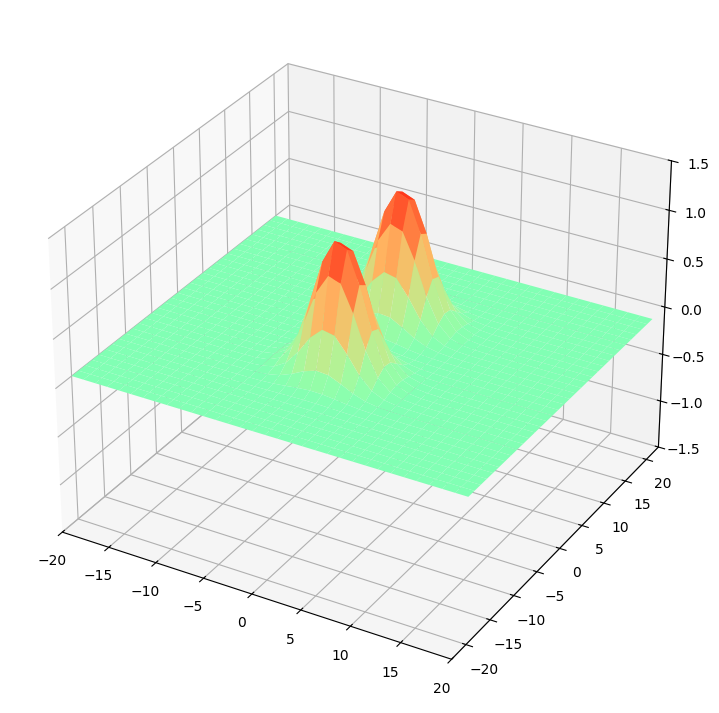

In [100]:
#Animate Bubble Growth 2D-------------------------
import numpy
import scipy.ndimage.filters as filters
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as clr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from itertools import count
from IPython import display

#TIME SERIES ANIMATE========================================
#SERIESQ=SERIESCREATE #SERIESCREATE//
SERIESQ=SERIESCREATE #SERIESCREATE//
#NUMPOINTS=20
#==========================================================
variable=4#THE SCALAR, ANGLE, KINETIC SCALAR, KINETIC ANGLE :GRAVITY 4through9 KINETIC GRAV as 9 through 15
#===========================================================

#NUMBER OF ANIMATE FRAMES
countframes=10 #product is QEND
DOUBLETIME=1

#Time Intervals
timejumps=0.04 #tj
#Frames total and to make for this image's timestamp

numtimes=countframes
totaltime=timejumps*numtimes

#FIGSIZE
FIGSIZE = 12



X3,Y3,Z3= np.meshgrid(np.linspace(-domain, domain, NN), np.linspace(-domain, domain, NN), np.linspace(-domain, domain, NN) ,indexing='ij')
#Animate SUB REGION OF DOMAIN
# fig=plt.figure(figsize=(4,4))
# ax=plt.subplot(aspect='equal')
ymin=-domain
ymax=domain
xmin=-domain
xmax=domain
#YCUT=1
#XCUT=1

# ax.axis([xmin,xmax,ymin,ymax])

#Figure------------------------------------
fig=plt.figure(figsize=(9,9))

#TEMP IMAGE--------------------------------
#This is ......the modifier Matrix for Cells
#stencil=numpy.array([[0,1,0],[1,-4,1],[0,1,0]])
#New grid density: -5 to 5
#x=numpy.linspace(-domain,domain,NUMPOINTS)
#xx,yy=numpy.meshgrid(x,x)
#Step size changes: The physical distance beteen neighbouring grid points
#step=x[1]-x[0]
#FUNC: Z(x,y)
#image=numpy.exp(-xx**2-yy**2)
#PICK A QUANTITY from 0-13 for STATEVECTORLENGTH
#Pick a Z value to slice image
#zvalue=round(NUMPOINTS/2)
DATAFRAME=SERIESQ[0]
image= DATAFRAME[variable,:,:,MIDDLE2]

#--------------------------------------------

#--------------------------------------------

image1 = count() #iterator
#========================================================================================================================================================================================================================================================
#FRAME=SERIESQ[0,variable,:,:,MIDDLE2]
FRAME=SERIESQ[0,0,:,:,MIDDLE2]**2+SERIESQ[0,1,:,:,MIDDLE2]**2
#========================================================================================================================================================================================================================================================

def animateC(i):
  #Clear past plot
    plt.clf()
  #timeinterval
    timeinterval=timejumps#seconds universe time
    t=next(image1)*timeinterval #Time intervals*integer countframes can multiply new time jumps *timeinterval
    index=round(t/timeinterval)
  #print(t)
  #PLOT NEW FRAME
  ###############LAPLACIANS#################################
  #Laplace: second derivative Functions; Stencil: matrix...; Convolve: ; mode:; over stepsize: ;
    global FRAME
  #initialize
    if index==0:
    #print(next(image1))
        FRAME=FRAME
    #plt.axis([xmin,xmax,ymin,ymax])
    else:
        #=======================================================================================================================================================================
        #FRAME=SERIESQ[index*DOUBLETIME,variable,:,:,MIDDLE2]
        FRAME=(SERIESQ[index*DOUBLETIME,0,:,:,MIDDLE2]**2 + SERIESQ[index*DOUBLETIME,1,:,:,MIDDLE2]**2) #MATCHED 1 2 3 below
        #=======================================================================================================================================================================
        #FRAME=SERIESQ[index*DOUBLETIME,variable,:,MIDDLE,:]
        #FRAME=SERIESQ[index*DOUBLETIME,variable,MIDDLE,:,:]
  #Evolve +dt : f(t+dt)= seventh order opertaor ordering, each defined================================================================
  #FRAME=filters.laplace(FRAME)/step**2
  #print(index)
  #print(index)
  #print(t)
  #print(index)
    ax1 = fig.add_subplot(111, projection ="3d")
  #lap2=filters.convolve(image,stencil,mode='wrap')/step**2
  #lap3=signal.convolve2d(image,stencil,mode='same')/step**2
  #lap4=4*image*(xx**2+yy**2)-4*image
  #===================================================================================================================================
  #ax=fig.add_subplot(2,2,ii+1) #4 plots , ii??
  #ax=fig.add_subplot(1,1,1) #4 plots , ii??
  #img=ax.imshow(lap1-lap4) #Difference between images
  #ax=fig.add_subplot(1,1,1)
  #ax.set_title('stencil - analytical (dx=%.4f)' %step)
  #ax.set_zlim(-1.01, 1.01)
  #ticks = np.linspace(0, 1, 5)
  #ticks=[0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]
  #cmap = mpl.cm.cool
  #norm = mpl.colors.Normalize(vmin=5, vmax=10)
  #VariableLimits = np.array([.1, .5])
  #norm = clr.BoundaryNorm(np.append(VariableLimits, 1000), ncolors=256)

  #cmap = mpl.cm.get_cmap('Set1', 200)
  #SLICEframe=ax.imshow(FRAME, vmin=-0.45*0, vmax=0.45*3,cmap='viridis') # PLOT THE IMAGE
    ZMAX=1.5e-0
    ZMIN=-1.5e-0
    #ZMAX=8*10**(-1)
    #ZMIN=-1*10**(-1)
    SLICEframe=ax1.plot_surface(X3[:,:,MIDDLE2], Y3[:,:,MIDDLE2], FRAME ,cmap=cm.rainbow,vmin=ZMIN, vmax=ZMAX) #BUMP plot
    #SLICEframe=ax1.plot_surface(X3[:,MIDDLE,:], Z3[:,MIDDLE,:], FRAME ,cmap=cm.viridis,vmin=ZMIN, vmax=ZMAX) #BUMP plot
    #SLICEframe=ax1.plot_surface(Y3[MIDDLE,:,:], Z3[MIDDLE,:,:], FRAME ,cmap=cm.viridis,vmin=ZMIN, vmax=ZMAX) #BUMP plot


    #surfXY = ax1.plot_surface(X3[:,:,MIDDLE2], Y3[:,:,MIDDLE2], QD[0,:,:,MIDDLE2], cmap=cm.viridis,vmin=0,vmax=0.5)
    ax1.set_zlim(ZMIN, ZMAX)
    ax1.set_xlim(xmin, xmax)
  #cb=plt.colorbar(SLICEframe)
  #cb.set_ticklabels(["{:.1%}".format(i) for i in ticks]) # set ticks of your format
  #cb.ax.set_yticklabels(["{:.1%}".format(i) for i in ticks]) # set ticks of your format
  #print(cb.get_ticks())
  #cb.set_ticks([0.2, 0.4, 0.6, 0.8])
  #cb.set_ticklabels(["A", "B", "C", "D"])
  #PLOT TEXT for FRAME with time
  #plt.text(NUMPOINTS-3, NUMPOINTS-2, round(t, 3),color='white')
    return SLICEframe
###
animation_bubble1 = animation.FuncAnimation(plt.gcf(),animateC,[0]*countframes,interval=50,blit=False)
###

#Pos w ranges in 0: lump: Rise:hole:fall//1:fall: lump:rise:hole//2:rise:hole:fall:lumo//3:lump Rise:hole:fall// Evolution in time may just be negative:
#video_1 = animation_bubble.to_html5_video()

#1e-12

#it absolut

In [101]:
###Animate================================================================
#====================
from IPython.display import HTML, display
#====================
V1=HTML(animation_bubble1.to_jshtml())
V1
#====================
#====================
####Animate===============================================================

<Figure size 640x480 with 0 Axes>

In [ ]:
#NOTES
#Could get back to higher order laplacian..

In [ ]:
# #ADM FORMALISM


# #RICCI 3X3
# Ricci_down_three= np.einsum('kkij-> ij',dGAMMA[co1,co2,co3,:,:,:,:])+np.einsum('ikkj-> ij',dGAMMA[co1,co2,co3,:,:,:,:])+np.einsum('kij,lkl, -> ij',GAMMA[co1,co2,co3,:,:,:],GAMMA[co1,co2,co3,:,:,:])+np.einsum('kil,lkj-> ij',GAMMA[co1,co2,co3,:,:,:],GAMMA[co1,co2,co3,:,:,:])

# Ricci_up_three= np.einsum('qw, er, wr-> qe'gamma_up[co1,co2,co3,:,:],gamma_up[co1,co2,co3,:,:],Ricci_down_three)
# RICCI_up= Ricci_up_three
# RDGAMMA=np.sqrt(np.linalg.det(gamma[co1,co2,co3,:,:]))
# KNUM=np.linalg.det(K[co1,co2,co3,:,:])
# Rzero=0
# Ri=0
# gammadot= 0+0 -(N/RDGAMMA)*(2*K[co1,co2,co3,:,:]-KNUM*gamma[co1,co2,co3,:,:])
# Kdot= -N*RDGAMMA*(RICCU_up[co1,co2,co3,:,:]-0.5*gamma_up[co1,co2,co3,:,:]*Ricci_SCALAR)             +               (N)/(2*RDGAMMA)*(np.einsum('ij,ij', K[co1,co2,co3,:,:],K_up[co1,co2,co3,:,:])-(KNUM**2)/2)*gamma_up[co1,co2,co3,:,:]-(2*N/RDGAMMA)*(np.einsum('ic,jk,ck',K_up[co1,co2,co3,:,:],gamma_up[co1,co2,co3,:,:],K[co1,co2,co3,:,:])-0.5*KNUM*K_up[co1,co2,co3,:,:])

In [153]:
# #ALL DOUBLES IN FULL RICCI
# from numpy import np.einsum as einsum


# line1= 0.5*einsum('rrs,nms-> mn',dgup,dgdown) +0.5*einsum('rrs,mns-> mn',dgup,dgdown)-0.5*einsum('rrs,smn-> mn',ddgup,dgdown)    +    0.5*einsum('rs,nrms-> mn',dgup,DDgdown)+0.5*einsum('rs,mrns-> mn',gup,DDgdwon )
# line2= -0.5*einsum('rs,srmn-> mn',gup,DDgdwon)-0.5*einsum('nrs,mrs-> mn',dgup,dgdown) -0.5*einsum('rs,mnrs-> mn',gup,DDgdown)   +    0.25*einsum('kl,nmk,rs,lrs-> mn',gup,dgdwon,gup,dgdwon) +0.25*('kl,mnk,rs,lrs-> mn',gup,dgdwon,gup,dgdwon)
# line3= -0.25*einsum('kl,kmn,rs,lrs-> mn',gup,dgdwon,gup,dgdown)-0.25*einsum('kl,mkr,rs,nls-> mn',gup,dgdown,gup,dgdown)-0.5*einsum('kl,kmr,rs,snl-> mn',gup,dgdown,gup,dgdown)+0.5*einsum('kl,kmr,rs,lns-> mn',gup,dgdown,gup,dgdown)


# R3low= line1+line2+line3
#  OUTPUTVECTOR=np.array((phi1,
#                            phi2,
#                            PI1 - (jb*VomegaT1(phi1,phi2,TTT)*dt - (1.0/1.0)*jb*dt*L1*scalefactor),
#                            PI2 - (jb*VomegaT2(phi1,phi2,TTT)*dt - (1.0/1.0)*jb*dt*L2*scalefactor),
#                            BETA11,BETA22,BETA33,BETA12,BETA13,BETA23,
#                            PIBETA11 +0*(-PIBETA11*dt)  +1.0*(((1/4.0)*Mpl**2)*gravityoff*GRAVFIRST*(LB1)*dt - gravityoff*dt*jbplus*(  V(np.sqrt(phi1**2 +phi2**2))*Voff + (1/2)*(  fg11db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIX)+ fg12db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIY)+ fg13db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX*PHIZ)+ fg12db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY*PHIX)+ fg22db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIY)+ fg23db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIZ)+ fg13db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIX)+ fg23db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIY)+ fg33db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIZ)) + (1/2)*( fg11db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIX2)+ fg12db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIY2)+ fg13db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2*PHIZ2)+ fg12db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2*PHIX2)+ fg22db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIY2)+ fg23db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIZ2)+ fg13db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIX2)+ fg23db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIY2)+ fg33db11(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIZ2)))),
#                            PIBETA22 +0*(-PIBETA22*dt)  +1.0*(((1/4.0)*Mpl**2)*gravityoff*GRAVFIRST*(LB2)*dt - gravityoff*dt*jbplus*(  V(np.sqrt(phi1**2 +phi2**2))*Voff + (1/2)*(  fg11db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIX)+ fg12db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIY)+ fg13db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIZ)+ fg12db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIX)+ fg22db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIY)+ fg23db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIZ)+ fg13db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIX)+ fg23db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIY)+ fg33db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIZ) )+ (1/2)*(  fg11db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIX2)+ fg12db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIY2)+ fg13db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIZ2)+ fg12db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIX2)+ fg22db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIY2)+ fg23db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIZ2)+ fg13db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIX2)+ fg23db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIY2)+ fg33db22(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIZ2) ))),
#                            PIBETA33 +0*(-PIBETA33*dt)  +1.0*(((1/4.0)*Mpl**2)*gravityoff*GRAVFIRST*(LB3)*dt - gravityoff*dt*jbplus*(  V(np.sqrt(phi1**2 +phi2**2))*Voff + (1/2)*(  fg11db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIX)+ fg12db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIY)+ fg13db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIZ)+ fg12db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIX)+ fg22db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIY)+ fg23db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIZ)+ fg13db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIX)+ fg23db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIY)+ fg33db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIZ) )+ (1/2)*(  fg11db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIX2)+ fg12db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIY2)+ fg13db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIZ2)+ fg12db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIX2)+ fg22db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIY2)+ fg23db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIZ2)+ fg13db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIX2)+ fg23db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIY2)+ fg33db33(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIZ2) ))),
#                            PIBETA12 +0*(-PIBETA12*dt)  +1.0*(((1/4.0)*Mpl**2)*gravityoff*GRAVFIRST*(LB4)*dt - gravityoff*dt*jb*(  0*V(np.sqrt(phi1**2 +phi2**2))*Voff + (1/2)*(  fg11db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIX)+ fg12db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIY)+ fg13db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIZ)+ fg12db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIX)+ fg22db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIY)+ fg23db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIZ)+ fg13db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIX)+ fg23db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIY)+ fg33db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIZ) )+ (1/2)*(  fg11db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIX2)+ fg12db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIY2)+ fg13db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIZ2)+ fg12db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIX2)+ fg22db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIY2)+ fg23db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIZ2)+ fg13db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIX2)+ fg23db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIY2)+ fg33db12(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIZ2) ))),
#                            PIBETA13 +0*(-PIBETA13*dt)  +1.0*(((1/4.0)*Mpl**2)*gravityoff*GRAVFIRST*(LB5)*dt - gravityoff*dt*jb*(  0*V(np.sqrt(phi1**2 +phi2**2))*Voff + (1/2)*(  fg11db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIX)+ fg12db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIY)+ fg13db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIZ)+ fg12db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIX)+ fg22db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIY)+ fg23db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIZ)+ fg13db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIX)+ fg23db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIY)+ fg33db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIZ) )+ (1/2)*(  fg11db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIX2)+ fg12db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIY2)+ fg13db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIZ2)+ fg12db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIX2)+ fg22db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIY2)+ fg23db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIZ2)+ fg13db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIX2)+ fg23db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIY2)+ fg33db13(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIZ2) ))),
#                            PIBETA23 +0*(-PIBETA23*dt)  +1.0*(((1/4.0)*Mpl**2)*gravityoff*GRAVFIRST*(LB6)*dt - gravityoff*dt*jb*(  0*V(np.sqrt(phi1**2 +phi2**2))*Voff + (1/2)*(  fg11db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIX)+ fg12db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIY)+ fg13db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX)*(PHIZ)+ fg12db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIX)+ fg22db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIY)+ fg23db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY)*(PHIZ)+ fg13db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIX)+ fg23db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIY)+ fg33db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ)*(PHIZ) ) + (1/2)*(  fg11db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIX2)+ fg12db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIY2)+ fg13db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIX2)*(PHIZ2)+ fg12db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIX2)+ fg22db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIY2)+ fg23db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIY2)*(PHIZ2)+ fg13db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIX2)+ fg23db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIY2)+ fg33db23(BETA11,BETA12,BETA13,BETA22,BETA33,BETA23)*(PHIZ2)*(PHIZ2) )))))
#     #OUTPUTVECTOR[4:16]= np.zeros(12) #GRAVITY OFF/// pi1 -jbVomega dt...conjugate momenta updated by derivs of K and P  L1 is lapcalians L2 lapclians
#     # So in EOM 11.4 in 2209.12284 can we see hamiltonian updayes fr


# def dydTT(TT, y):
#     y1, y2,y3,y4,   y5,y6,y7   ,y8,y9,y10,   y11,y12,y13,   y14,y15,y16 = y
#     kk2= (1/Mpl**2)*(np.exp((-1.0/2.0)*(y5+y6+y7)))*(2*(y11**2+y12**2+y13**2)-(y11+y12+y13)**2  )
#     dydt= np.array([
#            0,
#            0,
#            0,
#            0,
#            ((2*np.exp(-(y5+y6+y7)/2))/Mpl**2)*(y11-y12-y13),#Mixed DEs dy/dt on t ot dt????
#            ((2*np.exp(-(y5+y6+y7)/2))/Mpl**2)*(y12-y11-y13),
#            ((2*np.exp(-(y5+y6+y7)/2))/Mpl**2)*(y13-y12-y11),
#            0,
#            0,
#            0,
#            KOFF*kk2/2,
#            KOFF*kk2/2,
#            KOFF*kk2/2,
#            0,
#            0,
#            0
#     ])
#     return dydt



# def OPERATORK2(vector,dt,K):
#     #UNPACKVECTOR
#     phi1,phi2,PI1,PI2,BETA11,BETA22,BETA33,BETA12,BETA13,BETA23,PIBETA11,PIBETA22,PIBETA33,PIBETA12,PIBETA13,PIBETA23=vector
#     expressK2= (np.exp((-1.0/2.0)*(BETA11+BETA22+BETA33)))*(2*(BETA11**2+BETA22**2+BETA33**2)-(BETA11+BETA22+BETA33)**2  )
#     eb=2.0*(1/(Mpl**2))*np.exp((-1.0/2.0)*(BETA11+BETA22+BETA33))
#     OUTPUTVECTOR=np.array((phi1 ,
#                            phi2,
#                            PI1,
#                            PI2,
#                            BETA11+eb*(PIBETA11-PIBETA22-PIBETA33)*dt,
#                            BETA22+eb*(PIBETA22-PIBETA11-PIBETA33)*dt,
#                            BETA33+eb*(PIBETA33-PIBETA11-PIBETA22)*dt,
#                            BETA12,BETA13,BETA23,
#                            PIBETA11+dt*KOFF*expressK2/2,
#                            PIBETA22+dt*KOFF*expressK2/2,
#                            PIBETA33+dt*KOFF*expressK2/2,
#                            PIBETA12,PIBETA13,PIBETA23))
#     #OUTPUTVECTOR[4:16]= np.zeros(12) #GRAVITY OFF
#     return OUTPUTVECTOR
# A=OPERATORK2


# def OPERATORK1(vector,dt,K):
#     #UNPACKVECTOR
#     phi1,phi2,PI1,PI2,BETA11,BETA22,BETA33,BETA12,BETA13,BETA23,PIBETA11,PIBETA22,PIBETA33,PIBETA12,PIBETA13,PIBETA23=vector
#     #print(BETA11)
#     eb=2*(1/(Mpl**2))*np.exp((-1.0/2.0)*(BETA11+BETA22+BETA33))
#     jb=(np.exp((-1.0/2.0)*(BETA11+BETA22+BETA33)))
#     jb2=(np.exp((-1.0/2.0)*(BETA11+BETA22+BETA33)))
#     #MODULO 2pi
#     expressK1= (np.exp((-1.0/2.0)*(BETA11+BETA22+BETA33)))*((PI1**2)/2 + (PI2**2)/2 + (1/Mpl**2)*(PIBETA23**2 + PIBETA13**2 +PIBETA12**2)   )
#     #MODULO=8.0*np.pi #(PItheta*dt*(np.exp((1.0/2.0)*(BETA11+BETA22+BETA33)))+theta1)%MODULO
#     #OUTPUTVECTOR=np.array((PI1*dt*jb + phi1 ,(theatoff*PItheta*dt*(np.exp((1.0/2.0)*(BETA11+BETA22+BETA33)))+theta1)%MODULO,PI1,PItheta ,BETA11,BETA22,BETA33,BETA12+dt*eb*PIBETA12,BETA13+dt*eb*PIBETA13,BETA23+dt*eb*PIBETA23,PIBETA11+dt*K/2,PIBETA22+dt*K/2,PIBETA33+dt*K/2,PIBETA12,PIBETA13,PIBETA23))
#     OUTPUTVECTOR=np.array((phi1 + PI1*dt*jb  ,
#                            phi2 + PI2*dt*jb,
#                            PI1,PI2,
#                            BETA11,BETA22,BETA33,
#                            BETA12+dt*eb*PIBETA12,
#                            BETA13+dt*eb*PIBETA13,
#                            BETA23+dt*eb*PIBETA23,
#                            PIBETA11+dt*KOFF*expressK1/2,
#                            PIBETA22+dt*KOFF*expressK1/2,
#                            PIBETA33+dt*KOFF*expressK1/2,
#                            PIBETA12,PIBETA13,PIBETA23))
#     #OUTPUTVECTOR[4:16]= np.zeros(12) #GRAVITY OFF
#     #OUTPUTVECTOR[4:16]= np.zeros(12) #GRAVITY OFF
#     return  OUTPUTVECTOR


#SYMPLECTIC INTEGRATOR